In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Input data files are available in the "/covid19-global-forecasting-week-2/" directory.

import os
currentDir = os.getcwd()
for dirname, _, filenames in os.walk(currentDir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asad\Desktop\covid19_project\covid19-global-forecasting-week-2.zip
C:\Users\Asad\Desktop\covid19_project\Untitled.ipynb
C:\Users\Asad\Desktop\covid19_project\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:\Users\Asad\Desktop\covid19_project\covid19-global-forecasting-week-2\submission.csv
C:\Users\Asad\Desktop\covid19_project\covid19-global-forecasting-week-2\test.csv
C:\Users\Asad\Desktop\covid19_project\covid19-global-forecasting-week-2\train.csv


In [2]:
df_train = pd.read_csv(r'covid19-global-forecasting-week-2\train.csv')
df_test = pd.read_csv(r'covid19-global-forecasting-week-2\test.csv')
df_submission = pd.read_csv(r'covid19-global-forecasting-week-2\submission.csv')

In [3]:
display(df_train.head(10))
df_train.describe()

Id Country_Region Province_State        Date  ConfirmedCases  Fatalities
0   1    Afghanistan            NaN  2020-01-22             0.0         0.0
1   2    Afghanistan            NaN  2020-01-23             0.0         0.0
2   3    Afghanistan            NaN  2020-01-24             0.0         0.0
3   4    Afghanistan            NaN  2020-01-25             0.0         0.0
4   5    Afghanistan            NaN  2020-01-26             0.0         0.0
5   6    Afghanistan            NaN  2020-01-27             0.0         0.0
6   7    Afghanistan            NaN  2020-01-28             0.0         0.0
7   8    Afghanistan            NaN  2020-01-29             0.0         0.0
8   9    Afghanistan            NaN  2020-01-30             0.0         0.0
9  10    Afghanistan            NaN  2020-01-31             0.0         0.0

Id  ConfirmedCases    Fatalities
count  18816.000000    18816.000000  18816.000000
mean   14682.500000      343.114052     12.672619
std     8487.245502     3580.120962    183.124487
min        1.000000        0.000000      0.000000
25%     7332.750000        0.000000      0.000000
50%    14682.500000        0.000000      0.000000
75%    22032.250000       15.000000      0.000000
max    29364.000000    74386.000000   7503.000000

In [4]:
display(df_test.head(10))
df_test.describe()

ForecastId Country_Region Province_State        Date
0           1    Afghanistan            NaN  2020-03-19
1           2    Afghanistan            NaN  2020-03-20
2           3    Afghanistan            NaN  2020-03-21
3           4    Afghanistan            NaN  2020-03-22
4           5    Afghanistan            NaN  2020-03-23
5           6    Afghanistan            NaN  2020-03-24
6           7    Afghanistan            NaN  2020-03-25
7           8    Afghanistan            NaN  2020-03-26
8           9    Afghanistan            NaN  2020-03-27
9          10    Afghanistan            NaN  2020-03-28

ForecastId
count  12642.000000
mean    6321.500000
std     3649.575386
min        1.000000
25%     3161.250000
50%     6321.500000
75%     9481.750000
max    12642.000000

In [5]:
display(df_submission.head(10))
df_submission.describe()

ForecastId  ConfirmedCases  Fatalities
0           1               1           1
1           2               1           1
2           3               1           1
3           4               1           1
4           5               1           1
5           6               1           1
6           7               1           1
7           8               1           1
8           9               1           1
9          10               1           1

ForecastId  ConfirmedCases  Fatalities
count  12642.000000         12642.0     12642.0
mean    6321.500000             1.0         1.0
std     3649.575386             0.0         0.0
min        1.000000             1.0         1.0
25%     3161.250000             1.0         1.0
50%     6321.500000             1.0         1.0
75%     9481.750000             1.0         1.0
max    12642.000000             1.0         1.0

Make work_list and date_list

In [6]:
# date_list(from 2020-1-22 until 2020-3-18)
work_list = []
first_date = df_train['Date'][0]
last_date = '2020-03-18'
inner_list = []
data_in_status = 0
for i in range(len(df_train)):
    date = df_train['Date'][i]
    if date == first_date:
        date_list = []
        data_in_status = 1
    if data_in_status == 1:
        province_state = df_train['Province_State'][i]
        country_region = df_train['Country_Region'][i]
        confirmed_cases = df_train['ConfirmedCases'][i]
        fatalities = df_train['Fatalities'][i]
        inner_dic = {'Province_State':province_state,
                     'Country_Region':country_region,
                     'Date':date,
                     'ConfirmedCases':confirmed_cases,
                     'Fatalities':fatalities
                    }
        inner_list.append(inner_dic)
        date_list.append(date)
        if date == last_date:
            work_list.append(inner_list)
            data_in_status = 0
            inner_list = []
np_date_list = np.array(date_list)
#np_date_list

In [7]:
# Make add_date_list(from 2020-03-19 untill 2020-04-30)
add_date_list = []
for i in range(len(df_test['Date'])):
    date = df_test['Date'][i]
    add_date_list.append(date)
    if date == '2020-04-30':
        break
np_add_date_list = np.array(add_date_list)
#np_add_date_list

Nonlinear regression analysis

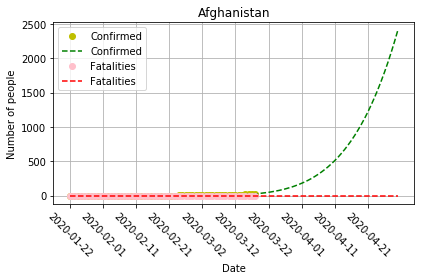

Score(Confirmed):0.975
Score(Fatalities):1.000


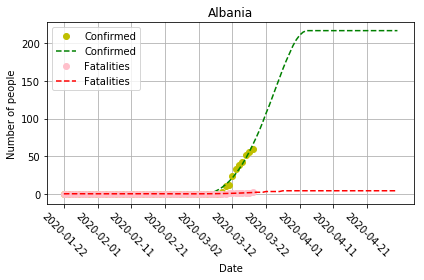

Score(Confirmed):0.976
Score(Fatalities):0.875


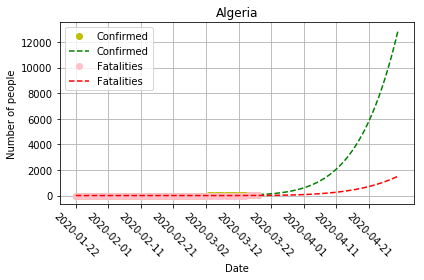

Score(Confirmed):0.984
Score(Fatalities):0.959


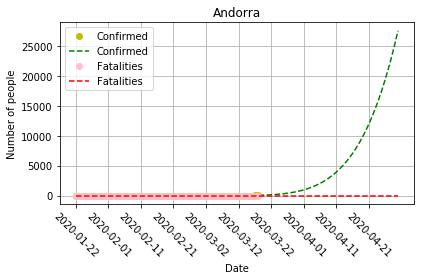

Score(Confirmed):0.797
Score(Fatalities):1.000


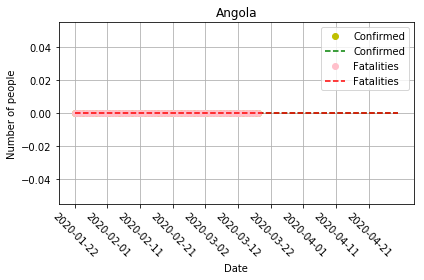

Score(Confirmed):1.000
Score(Fatalities):1.000


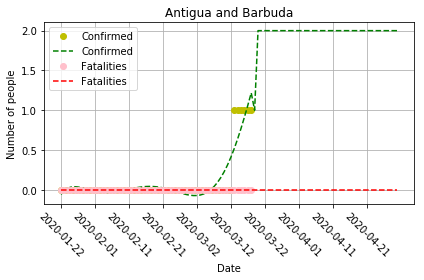

Score(Confirmed):0.837
Score(Fatalities):1.000


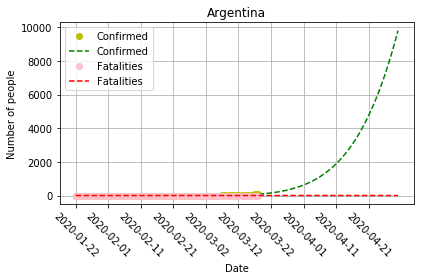

Score(Confirmed):0.996
Score(Fatalities):0.950


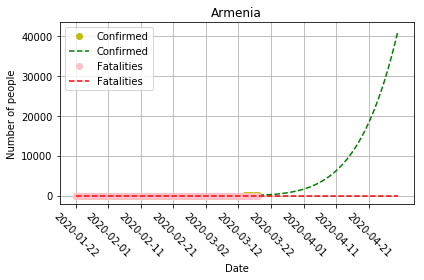

Score(Confirmed):0.975
Score(Fatalities):1.000


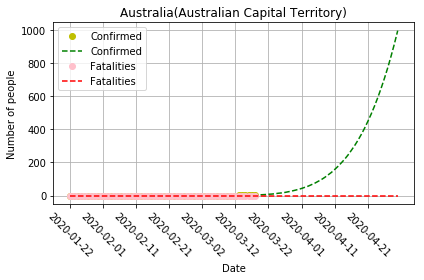

Score(Confirmed):0.965
Score(Fatalities):1.000


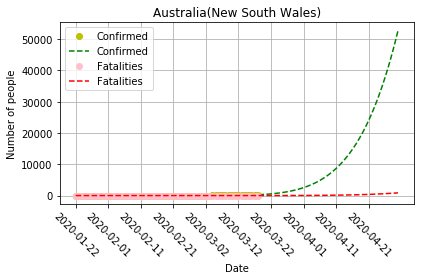

Score(Confirmed):0.996
Score(Fatalities):0.910


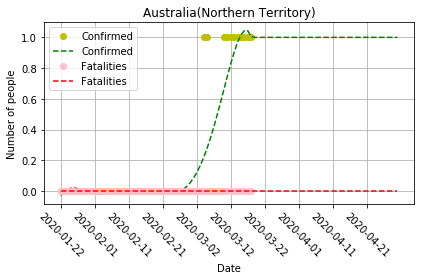

Score(Confirmed):0.743
Score(Fatalities):1.000


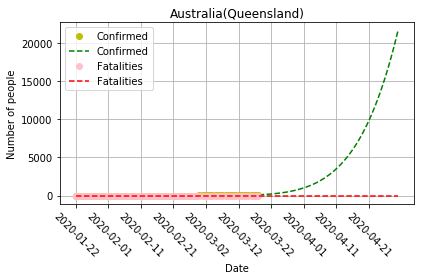

Score(Confirmed):0.988
Score(Fatalities):1.000


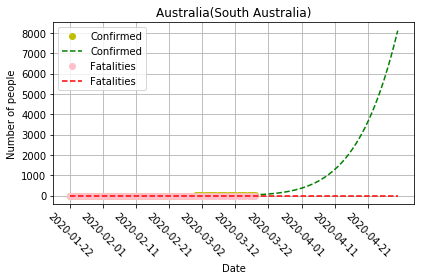

Score(Confirmed):0.985
Score(Fatalities):1.000


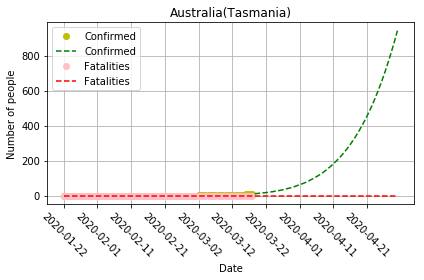

Score(Confirmed):0.986
Score(Fatalities):1.000


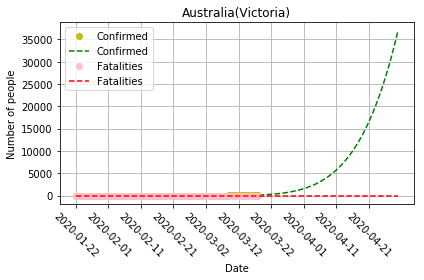

Score(Confirmed):0.995
Score(Fatalities):1.000


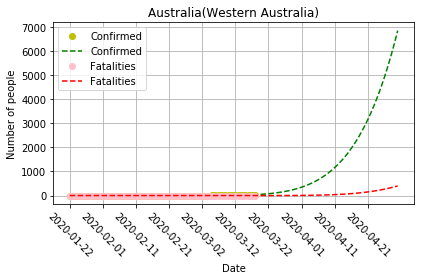

Score(Confirmed):0.989
Score(Fatalities):0.898


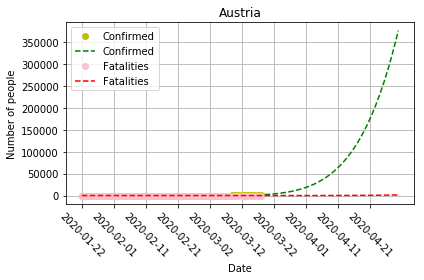

Score(Confirmed):0.998
Score(Fatalities):0.959


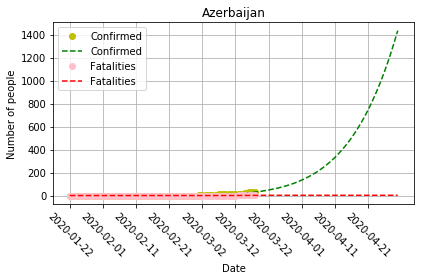

Score(Confirmed):0.978
Score(Fatalities):0.837


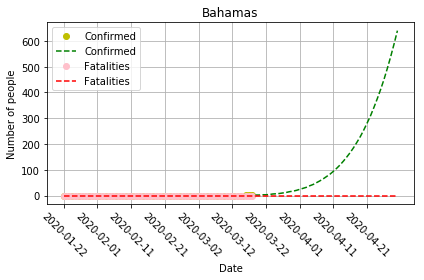

Score(Confirmed):0.835
Score(Fatalities):1.000


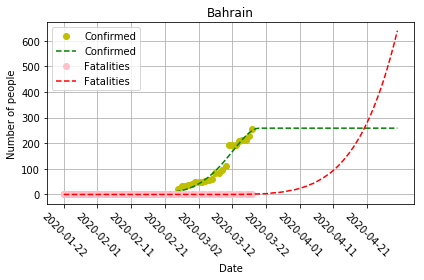

Score(Confirmed):0.976
Score(Fatalities):0.835


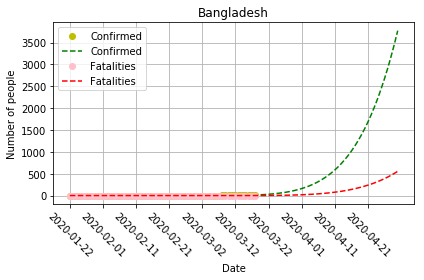

Score(Confirmed):0.951
Score(Fatalities):0.573


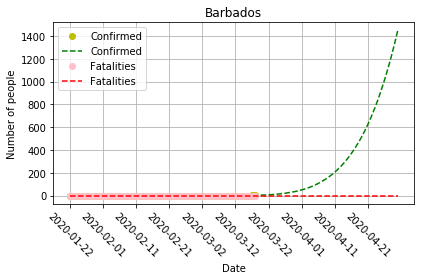

Score(Confirmed):0.783
Score(Fatalities):1.000


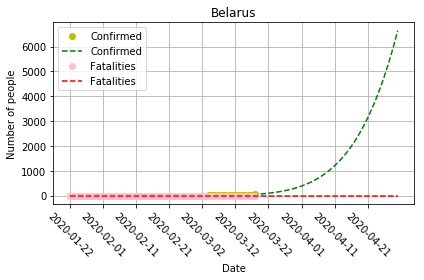

Score(Confirmed):0.975
Score(Fatalities):1.000


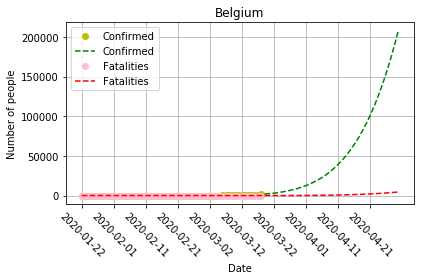

Score(Confirmed):0.995
Score(Fatalities):0.956


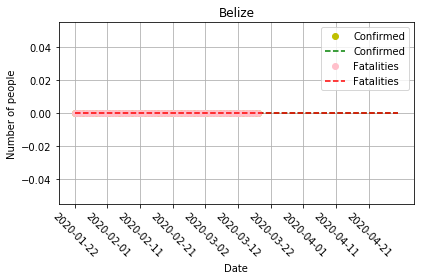

Score(Confirmed):1.000
Score(Fatalities):1.000


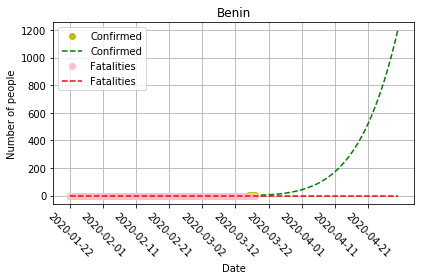

Score(Confirmed):0.899
Score(Fatalities):1.000


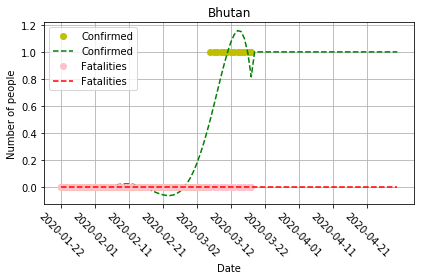

Score(Confirmed):0.895
Score(Fatalities):1.000


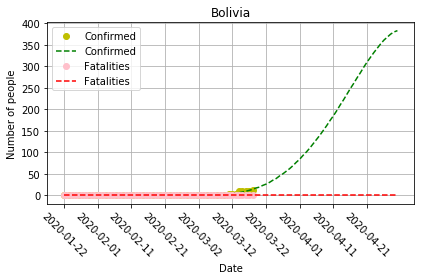

Score(Confirmed):0.925
Score(Fatalities):1.000


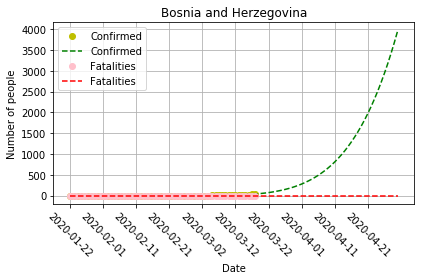

Score(Confirmed):0.987
Score(Fatalities):1.000


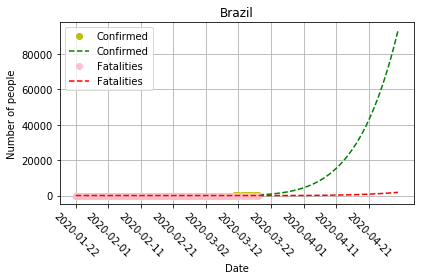

Score(Confirmed):0.983
Score(Fatalities):0.763


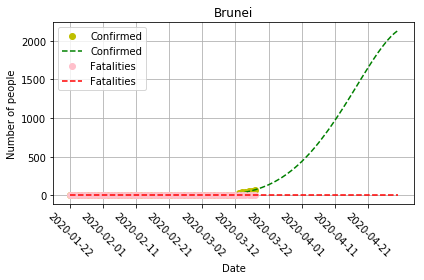

Score(Confirmed):0.958
Score(Fatalities):1.000


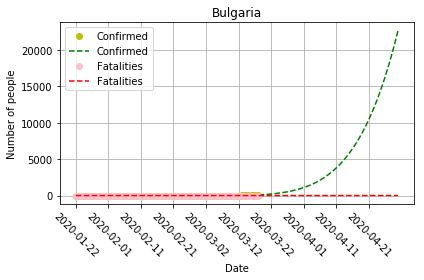

Score(Confirmed):0.983
Score(Fatalities):0.921


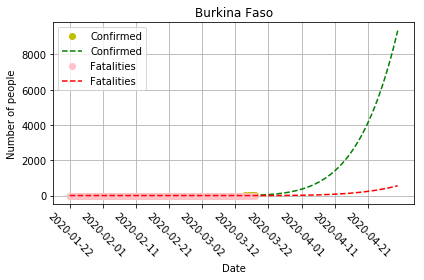

Score(Confirmed):0.934
Score(Fatalities):0.573


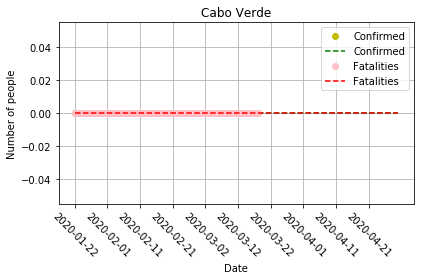

Score(Confirmed):1.000
Score(Fatalities):1.000


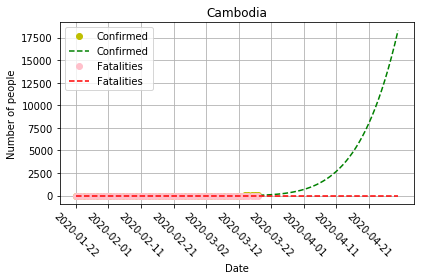

Score(Confirmed):0.892
Score(Fatalities):1.000


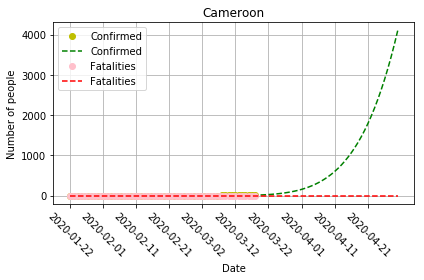

Score(Confirmed):0.892
Score(Fatalities):1.000


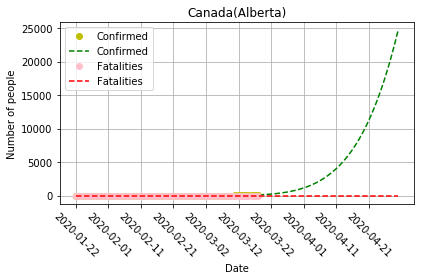

Score(Confirmed):0.993
Score(Fatalities):1.000


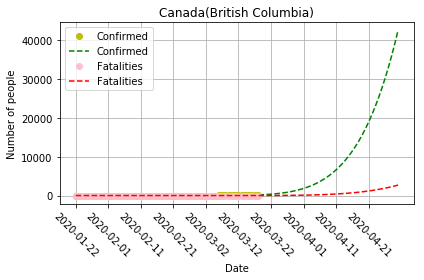

Score(Confirmed):0.969
Score(Fatalities):0.923


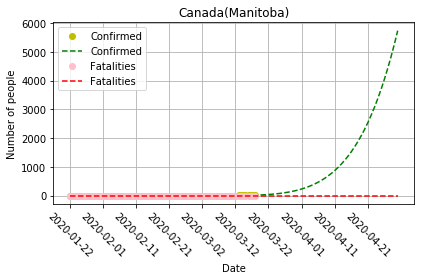

Score(Confirmed):0.959
Score(Fatalities):1.000


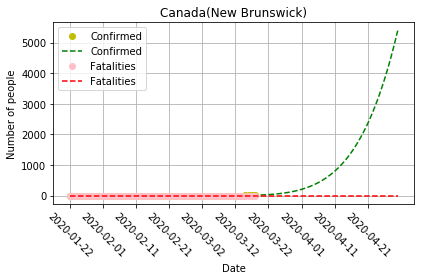

Score(Confirmed):0.964
Score(Fatalities):1.000


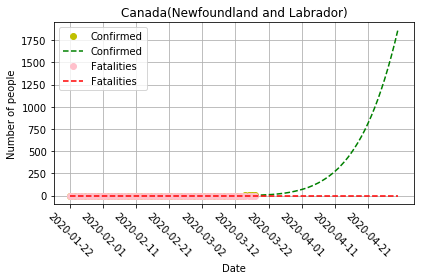

Score(Confirmed):0.919
Score(Fatalities):1.000


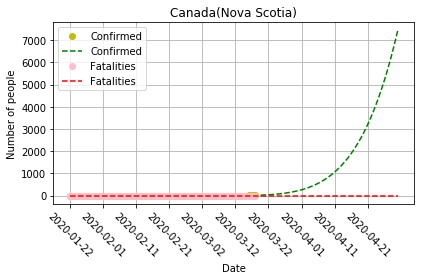

Score(Confirmed):0.915
Score(Fatalities):1.000


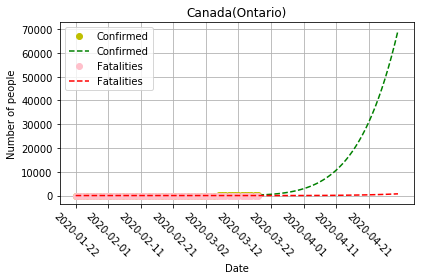

Score(Confirmed):0.983
Score(Fatalities):0.783


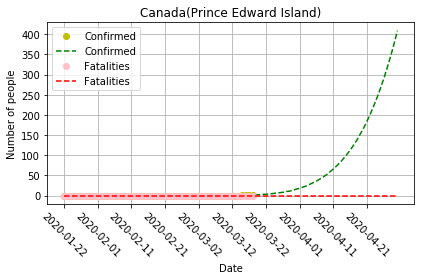

Score(Confirmed):0.837
Score(Fatalities):1.000


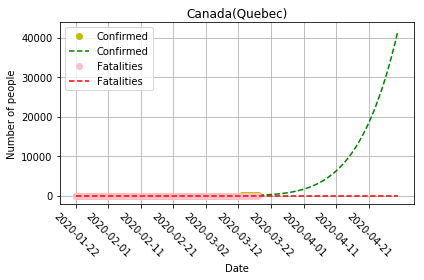

Score(Confirmed):0.980
Score(Fatalities):1.000


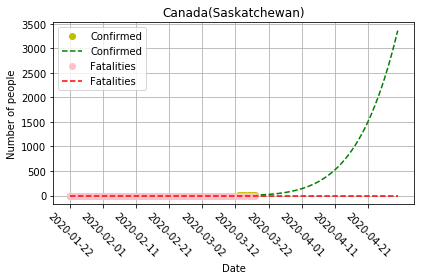

Score(Confirmed):0.942
Score(Fatalities):1.000


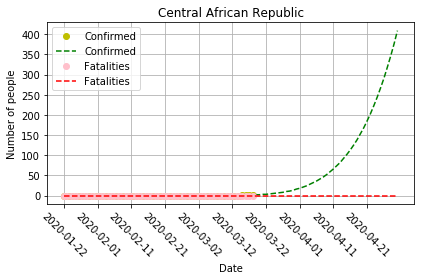

Score(Confirmed):0.837
Score(Fatalities):1.000


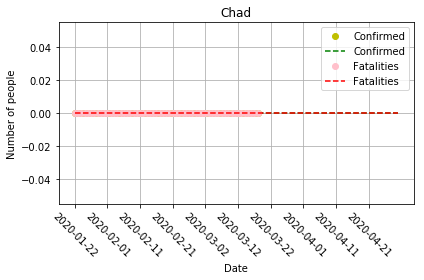

Score(Confirmed):1.000
Score(Fatalities):1.000


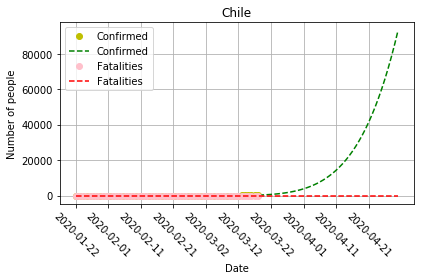

Score(Confirmed):0.985
Score(Fatalities):1.000


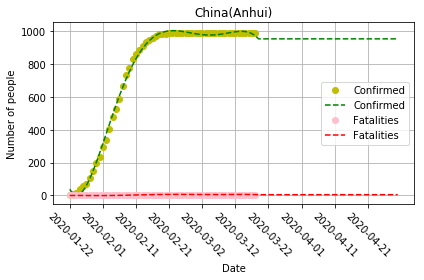

Score(Confirmed):0.998
Score(Fatalities):0.961


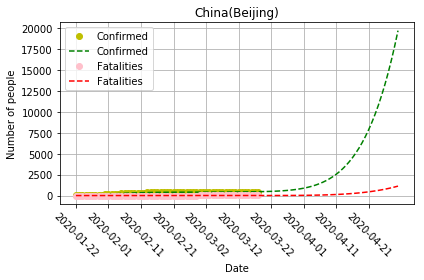

Score(Confirmed):0.998
Score(Fatalities):0.960


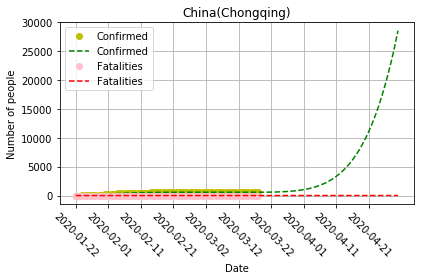

Score(Confirmed):0.999
Score(Fatalities):0.977


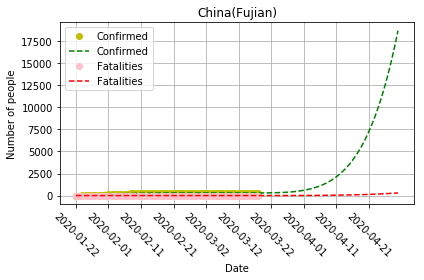

Score(Confirmed):0.999
Score(Fatalities):0.903


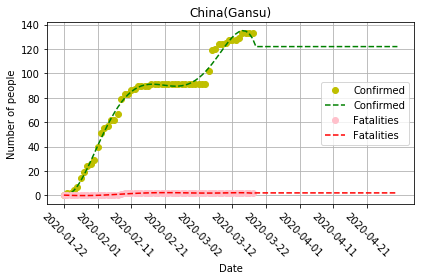

Score(Confirmed):0.991
Score(Fatalities):0.913


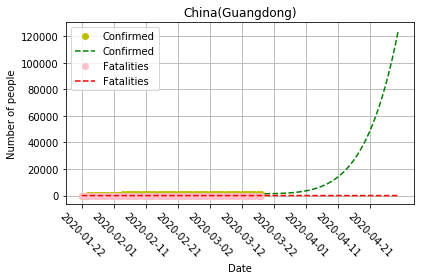

Score(Confirmed):0.999
Score(Fatalities):0.987


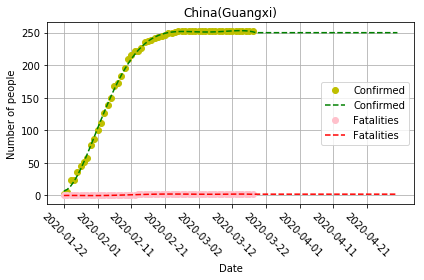

Score(Confirmed):0.999
Score(Fatalities):0.957


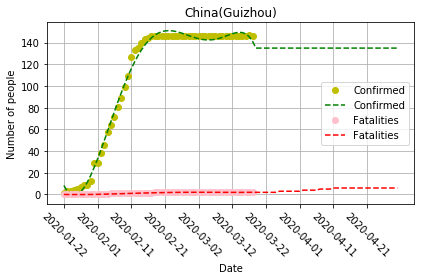

Score(Confirmed):0.994
Score(Fatalities):0.943


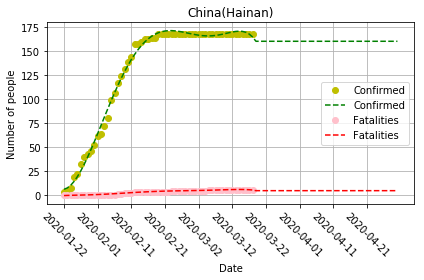

Score(Confirmed):0.995
Score(Fatalities):0.972


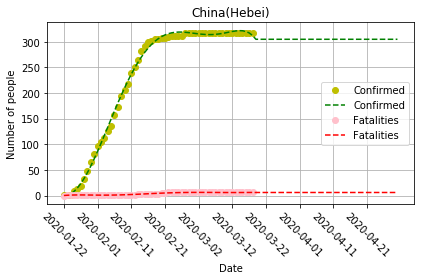

Score(Confirmed):0.998
Score(Fatalities):0.987


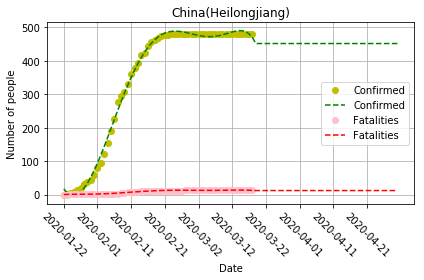

Score(Confirmed):0.997
Score(Fatalities):0.987


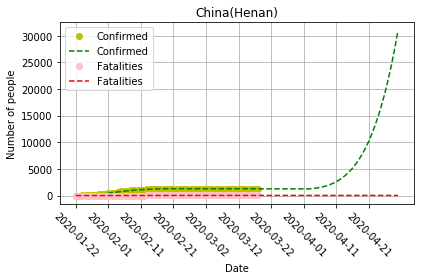

Score(Confirmed):0.999
Score(Fatalities):0.989


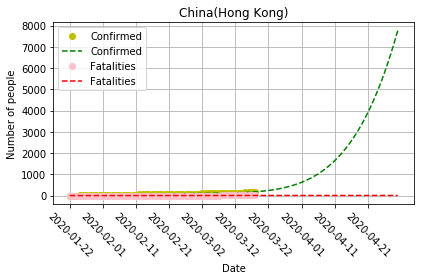

Score(Confirmed):0.996
Score(Fatalities):0.951


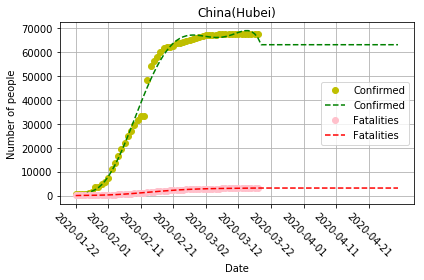

Score(Confirmed):0.993
Score(Fatalities):0.999


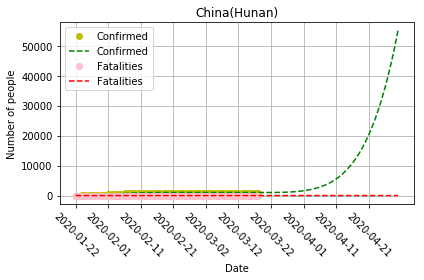

Score(Confirmed):0.999
Score(Fatalities):0.986


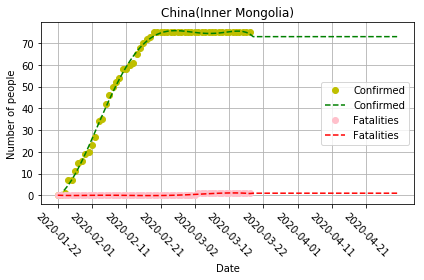

Score(Confirmed):0.998
Score(Fatalities):0.891


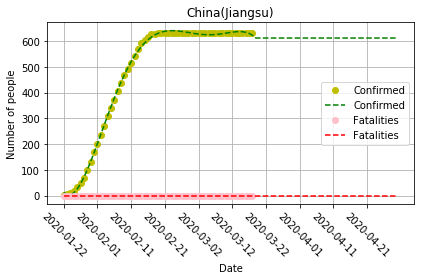

Score(Confirmed):0.999
Score(Fatalities):1.000


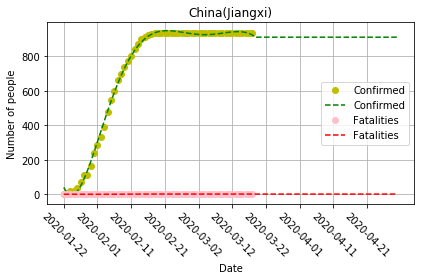

Score(Confirmed):0.998
Score(Fatalities):0.904


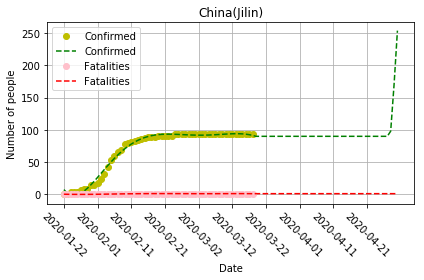

Score(Confirmed):0.990
Score(Fatalities):0.891


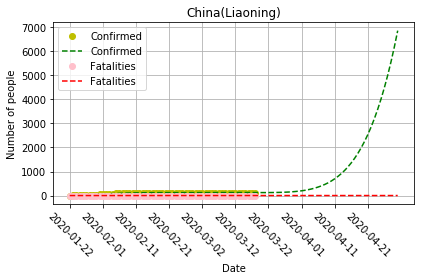

Score(Confirmed):0.998
Score(Fatalities):0.912


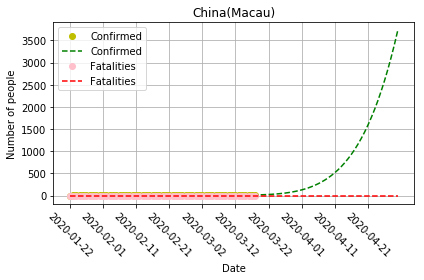

Score(Confirmed):0.963
Score(Fatalities):1.000


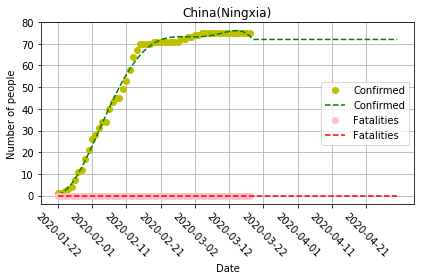

Score(Confirmed):0.995
Score(Fatalities):1.000


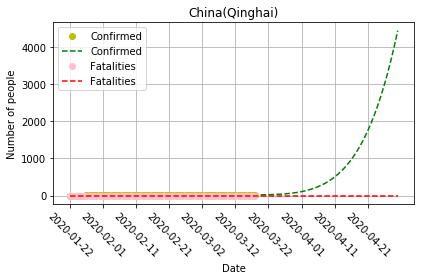

Score(Confirmed):0.985
Score(Fatalities):1.000


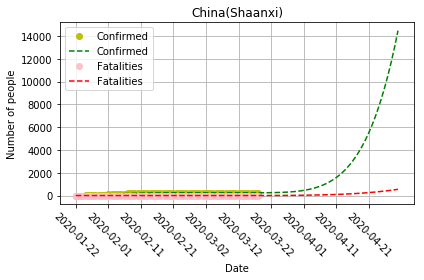

Score(Confirmed):0.999
Score(Fatalities):0.932


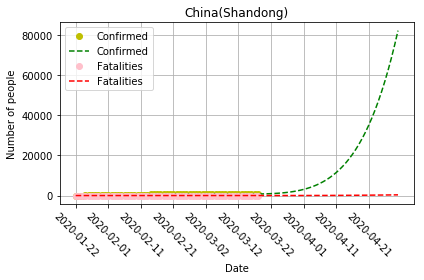

Score(Confirmed):0.987
Score(Fatalities):0.986


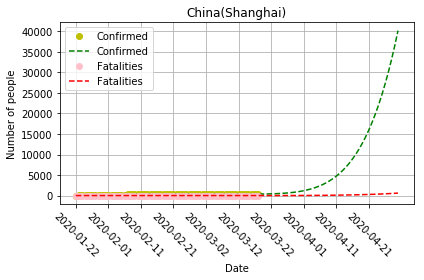

Score(Confirmed):0.999
Score(Fatalities):0.945


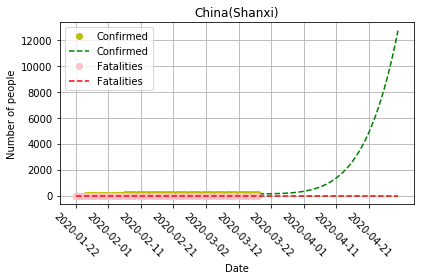

Score(Confirmed):0.996
Score(Fatalities):1.000


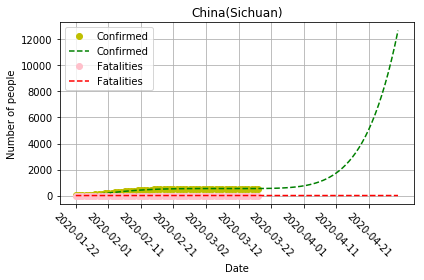

Score(Confirmed):1.000
Score(Fatalities):0.910


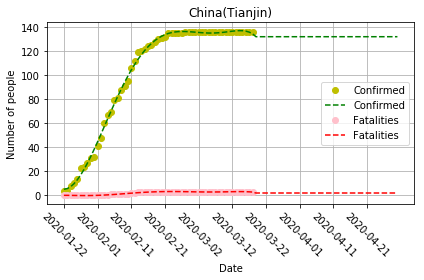

Score(Confirmed):0.998
Score(Fatalities):0.971


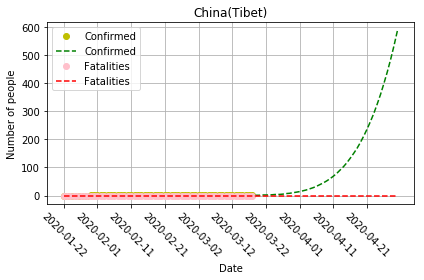

Score(Confirmed):0.866
Score(Fatalities):1.000


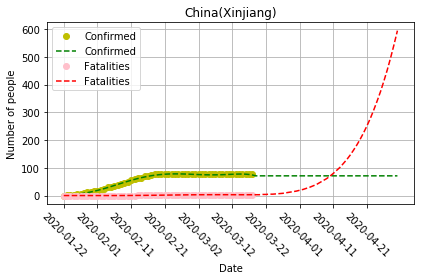

Score(Confirmed):0.997
Score(Fatalities):0.977


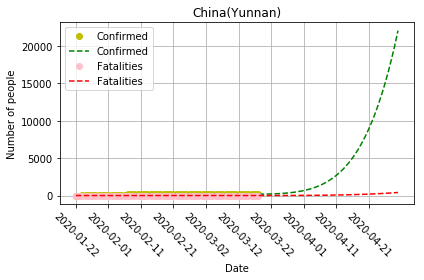

Score(Confirmed):0.996
Score(Fatalities):0.918


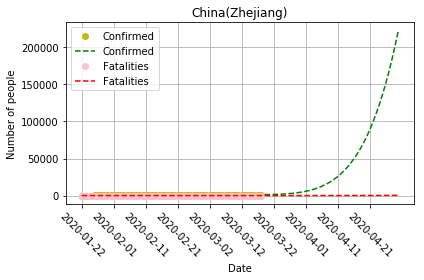

Score(Confirmed):0.998
Score(Fatalities):0.903


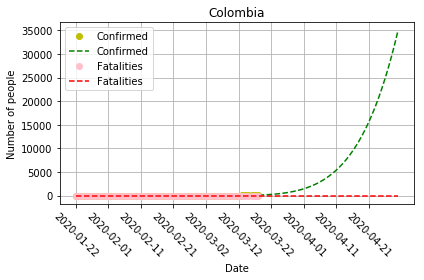

Score(Confirmed):0.993
Score(Fatalities):1.000


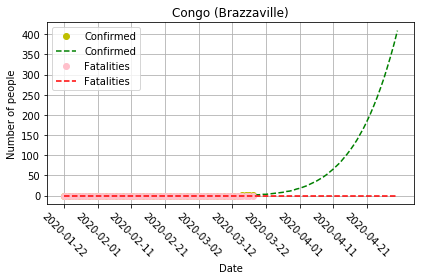

Score(Confirmed):0.837
Score(Fatalities):1.000


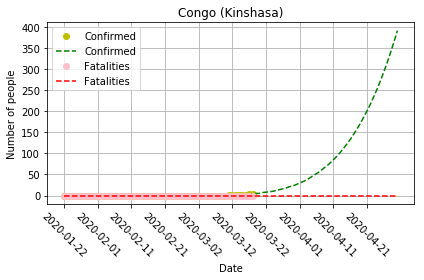

Score(Confirmed):0.957
Score(Fatalities):1.000


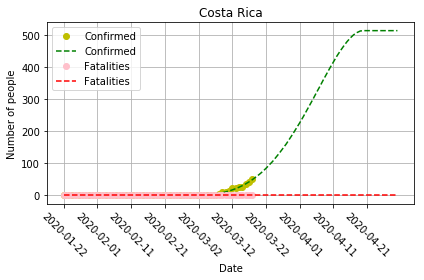

Score(Confirmed):0.990
Score(Fatalities):1.000


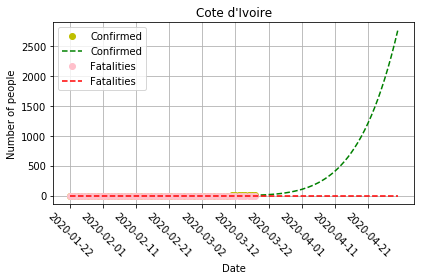

Score(Confirmed):0.885
Score(Fatalities):1.000


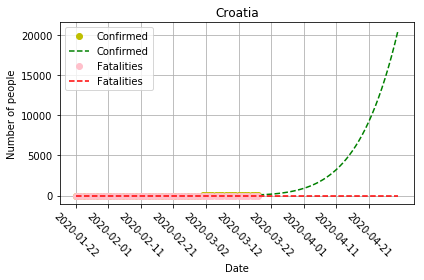

Score(Confirmed):0.992
Score(Fatalities):1.000


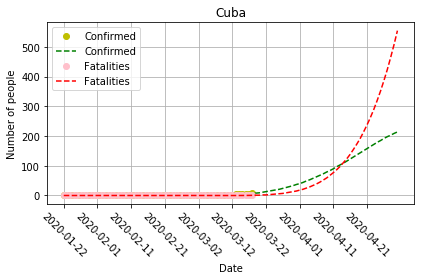

Score(Confirmed):0.926
Score(Fatalities):0.573


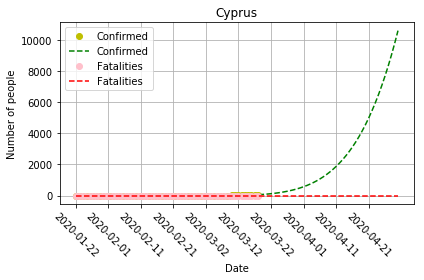

Score(Confirmed):0.984
Score(Fatalities):1.000


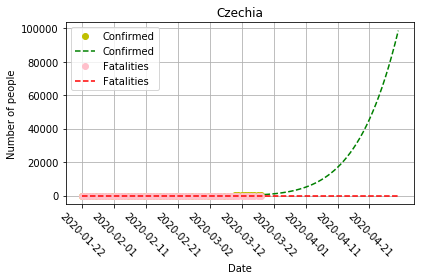

Score(Confirmed):0.997
Score(Fatalities):1.000


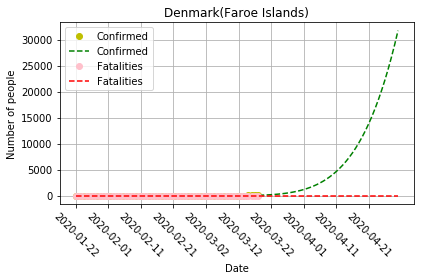

Score(Confirmed):0.944
Score(Fatalities):1.000


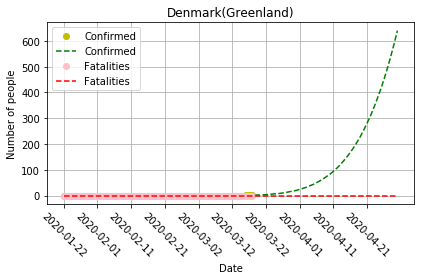

Score(Confirmed):0.835
Score(Fatalities):1.000


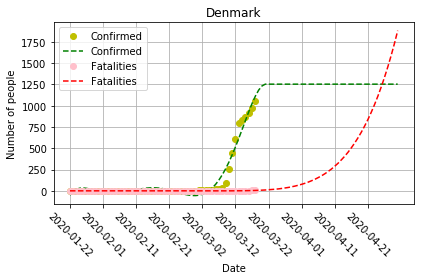

Score(Confirmed):0.964
Score(Fatalities):0.955


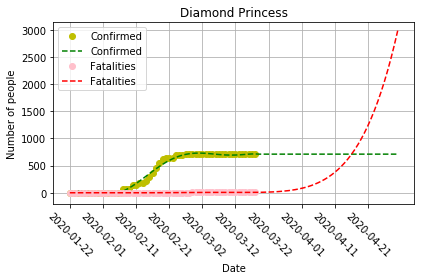

Score(Confirmed):0.989
Score(Fatalities):0.979


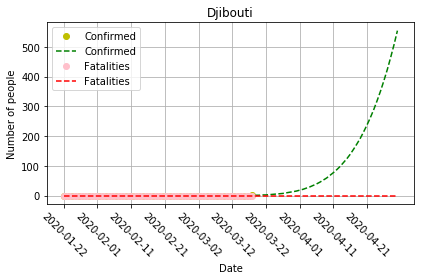

Score(Confirmed):0.573
Score(Fatalities):1.000


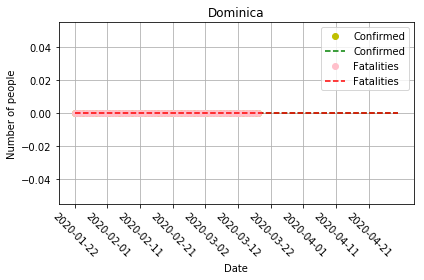

Score(Confirmed):1.000
Score(Fatalities):1.000


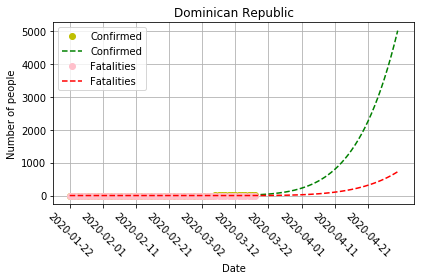

Score(Confirmed):0.961
Score(Fatalities):0.783


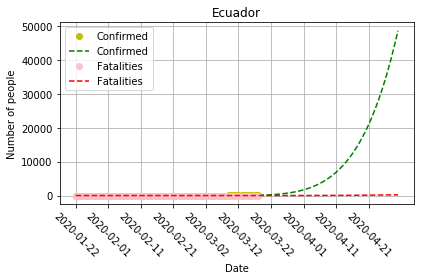

Score(Confirmed):0.924
Score(Fatalities):0.832


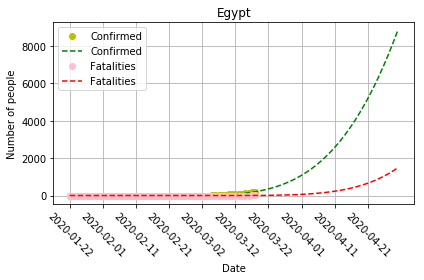

Score(Confirmed):0.985
Score(Fatalities):0.939


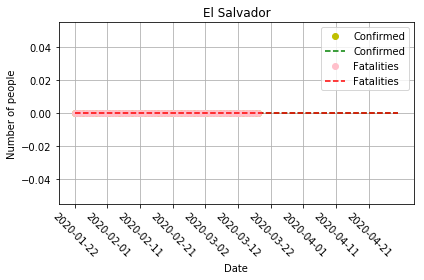

Score(Confirmed):1.000
Score(Fatalities):1.000


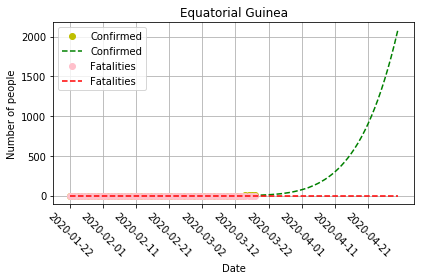

Score(Confirmed):0.840
Score(Fatalities):1.000


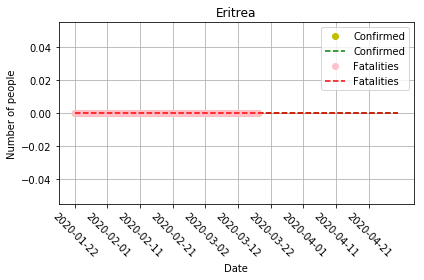

Score(Confirmed):1.000
Score(Fatalities):1.000


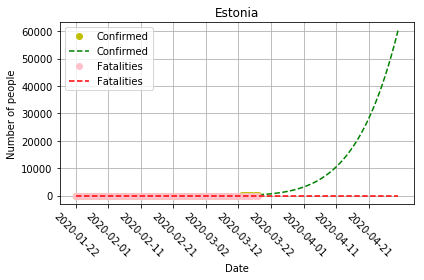

Score(Confirmed):0.971
Score(Fatalities):1.000


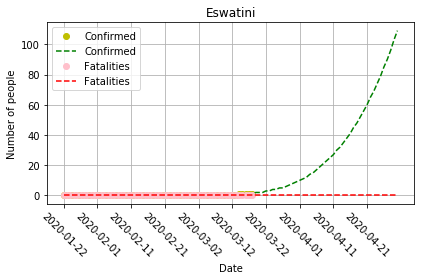

Score(Confirmed):0.832
Score(Fatalities):1.000


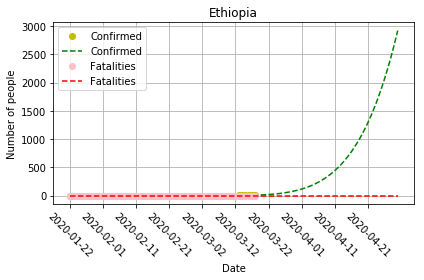

Score(Confirmed):0.933
Score(Fatalities):1.000


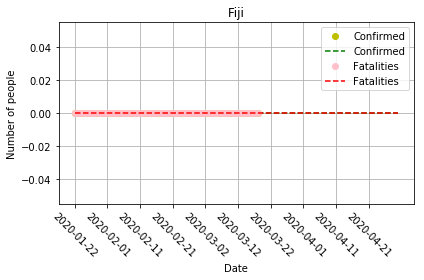

Score(Confirmed):1.000
Score(Fatalities):1.000


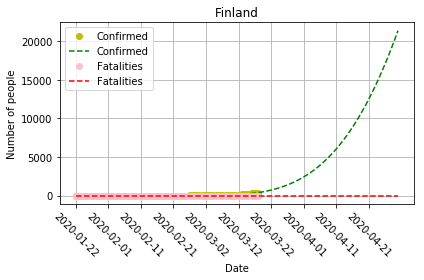

Score(Confirmed):0.972
Score(Fatalities):1.000


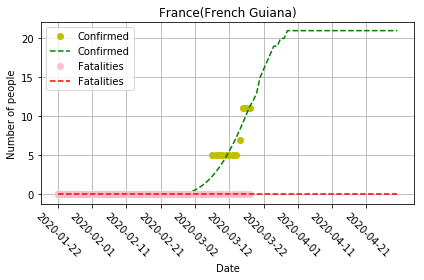

Score(Confirmed):0.928
Score(Fatalities):1.000


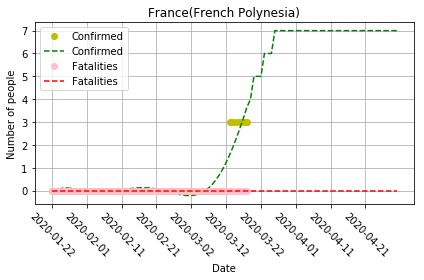

Score(Confirmed):0.837
Score(Fatalities):1.000


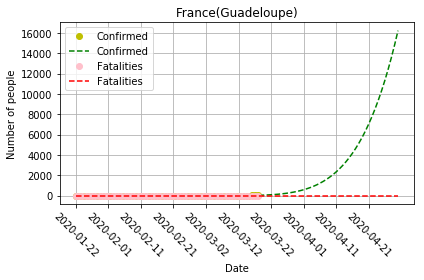

Score(Confirmed):0.925
Score(Fatalities):1.000


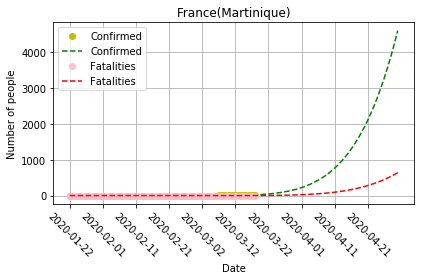

Score(Confirmed):0.976
Score(Fatalities):0.835


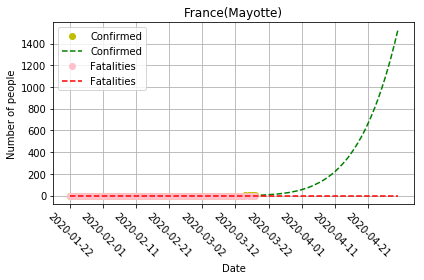

Score(Confirmed):0.885
Score(Fatalities):1.000


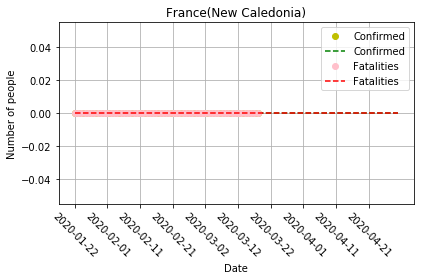

Score(Confirmed):1.000
Score(Fatalities):1.000


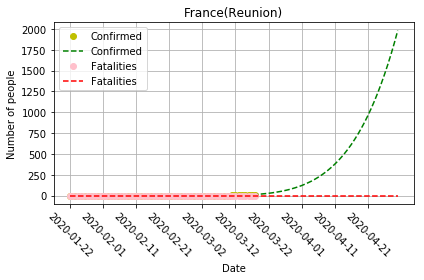

Score(Confirmed):0.967
Score(Fatalities):1.000


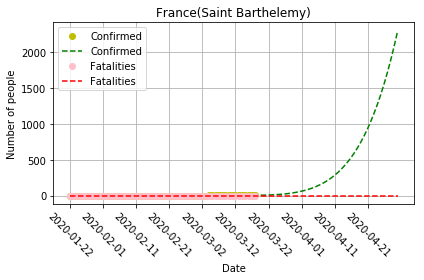

Score(Confirmed):0.629
Score(Fatalities):1.000


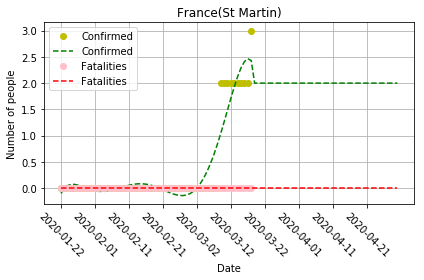

Score(Confirmed):0.884
Score(Fatalities):1.000


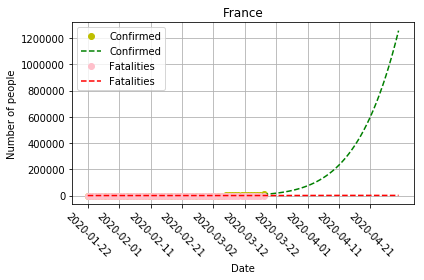

Score(Confirmed):0.995
Score(Fatalities):0.980


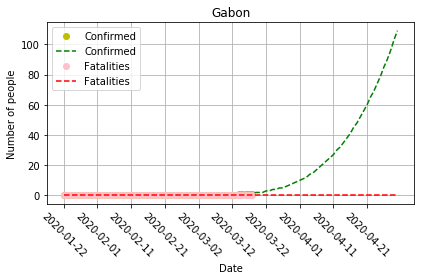

Score(Confirmed):0.832
Score(Fatalities):1.000


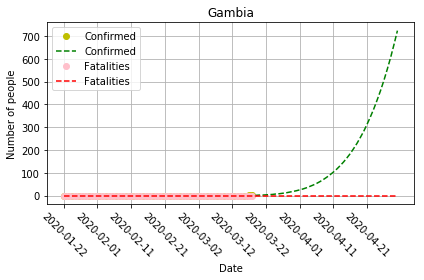

Score(Confirmed):0.783
Score(Fatalities):1.000


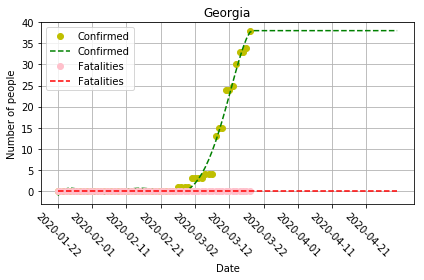

Score(Confirmed):0.984
Score(Fatalities):1.000


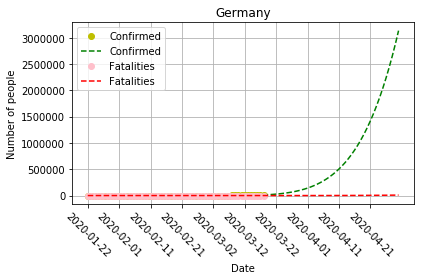

Score(Confirmed):0.997
Score(Fatalities):0.994


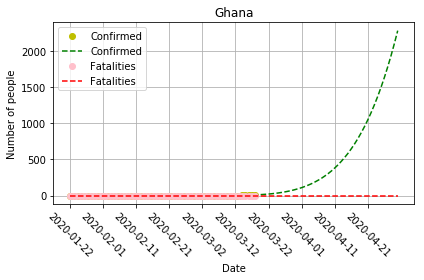

Score(Confirmed):0.911
Score(Fatalities):1.000


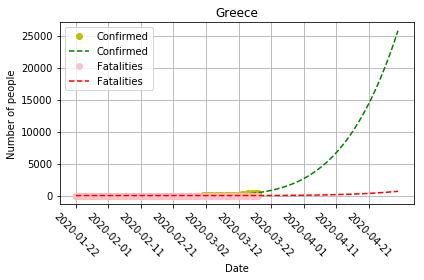

Score(Confirmed):0.985
Score(Fatalities):0.956


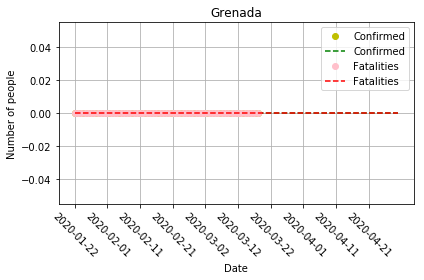

Score(Confirmed):1.000
Score(Fatalities):1.000


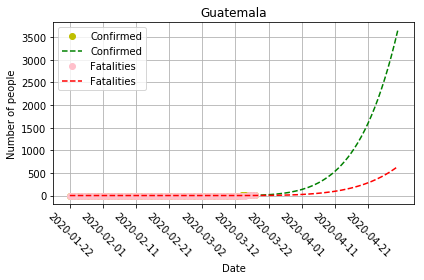

Score(Confirmed):0.922
Score(Fatalities):0.835


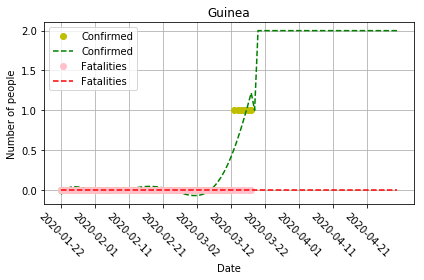

Score(Confirmed):0.837
Score(Fatalities):1.000


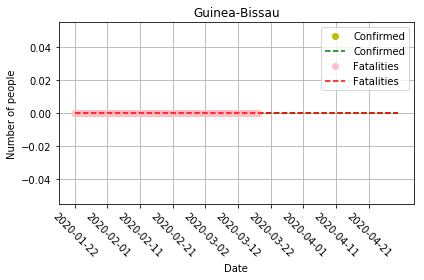

Score(Confirmed):1.000
Score(Fatalities):1.000


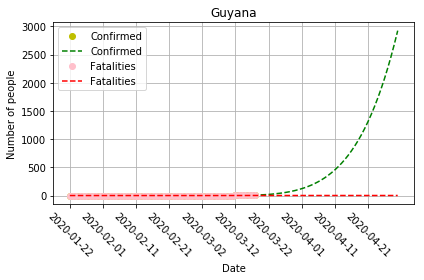

Score(Confirmed):0.961
Score(Fatalities):0.850


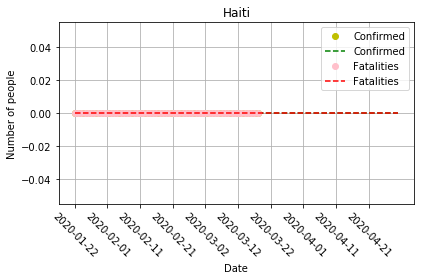

Score(Confirmed):1.000
Score(Fatalities):1.000


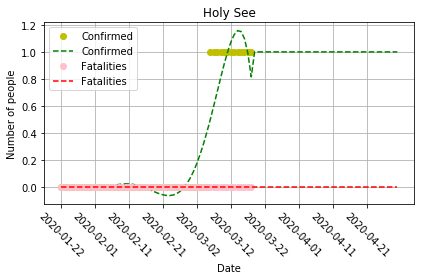

Score(Confirmed):0.895
Score(Fatalities):1.000


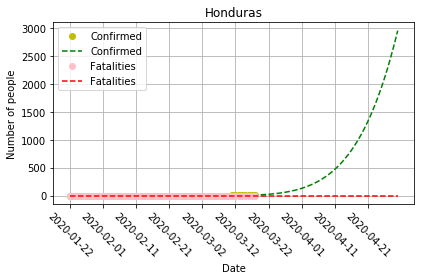

Score(Confirmed):0.972
Score(Fatalities):1.000


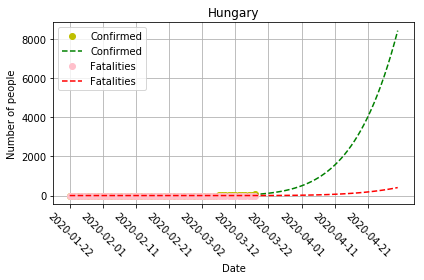

Score(Confirmed):0.995
Score(Fatalities):0.837


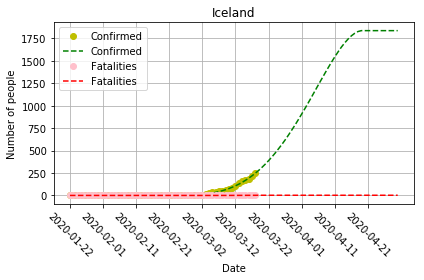

Score(Confirmed):0.996
Score(Fatalities):0.249


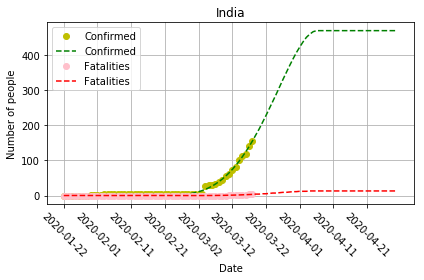

Score(Confirmed):0.994
Score(Fatalities):0.947


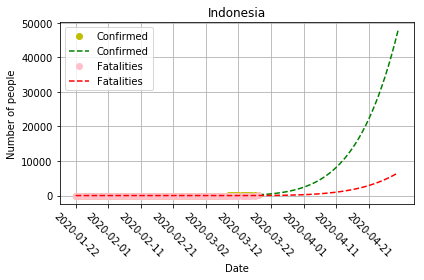

Score(Confirmed):0.995
Score(Fatalities):0.848


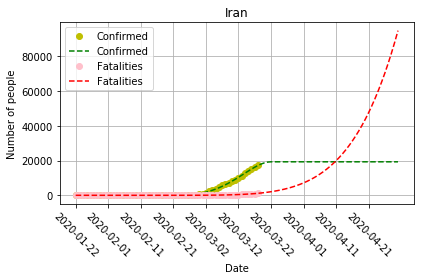

Score(Confirmed):0.999
Score(Fatalities):1.000


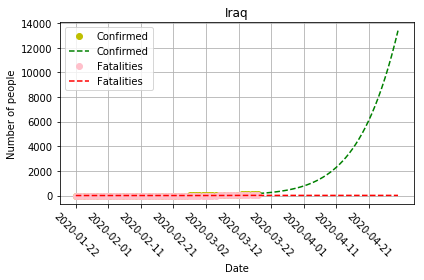

Score(Confirmed):0.993
Score(Fatalities):0.988


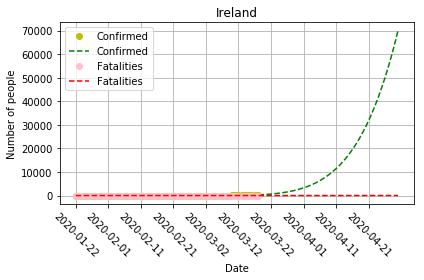

Score(Confirmed):0.992
Score(Fatalities):0.921


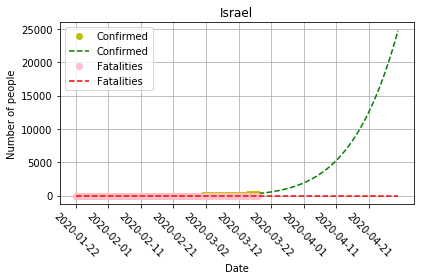

Score(Confirmed):0.995
Score(Fatalities):1.000


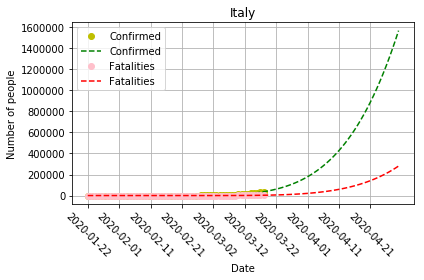

Score(Confirmed):0.998
Score(Fatalities):0.998


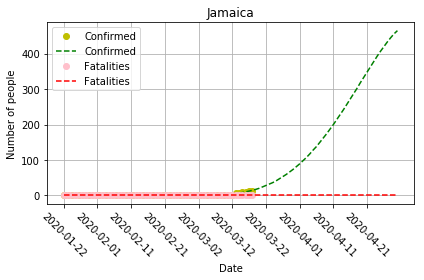

Score(Confirmed):0.943
Score(Fatalities):1.000


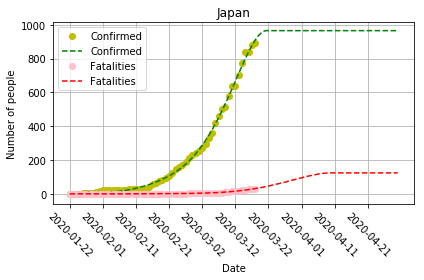

Score(Confirmed):0.998
Score(Fatalities):0.983


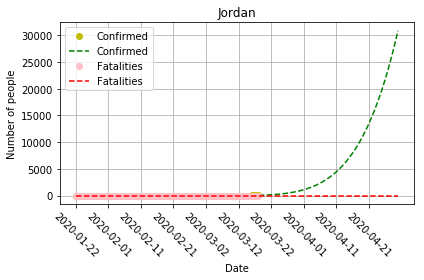

Score(Confirmed):0.940
Score(Fatalities):1.000


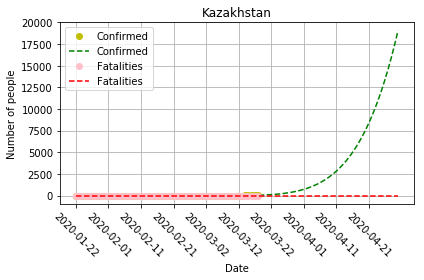

Score(Confirmed):0.938
Score(Fatalities):1.000


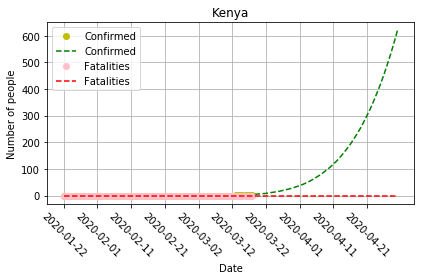

Score(Confirmed):0.900
Score(Fatalities):1.000


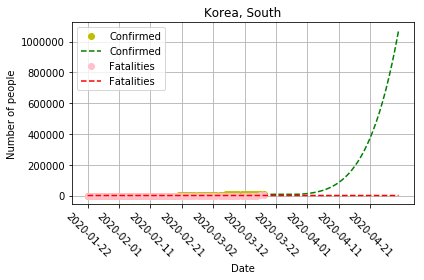

Score(Confirmed):0.993
Score(Fatalities):0.997


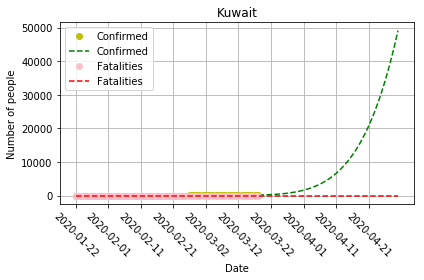

Score(Confirmed):0.980
Score(Fatalities):1.000


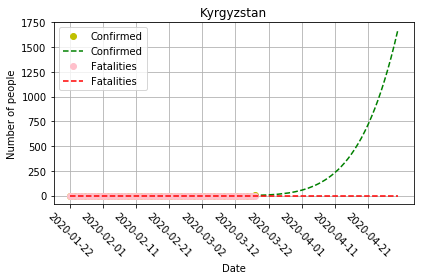

Score(Confirmed):0.573
Score(Fatalities):1.000


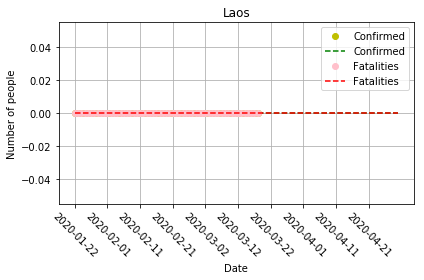

Score(Confirmed):1.000
Score(Fatalities):1.000


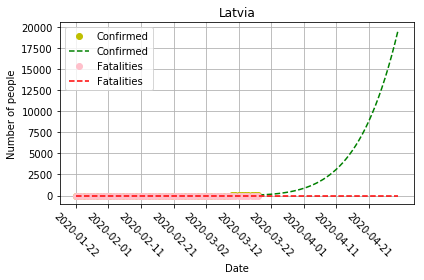

Score(Confirmed):0.989
Score(Fatalities):1.000


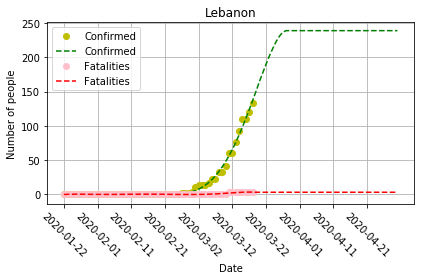

Score(Confirmed):0.993
Score(Fatalities):0.896


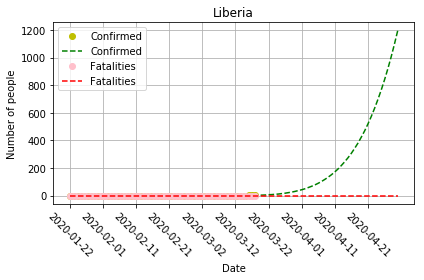

Score(Confirmed):0.899
Score(Fatalities):1.000


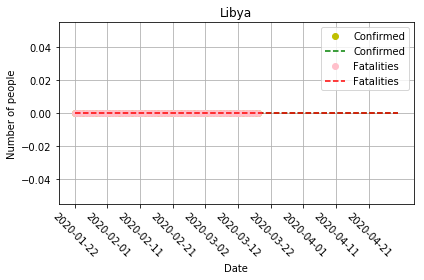

Score(Confirmed):1.000
Score(Fatalities):1.000


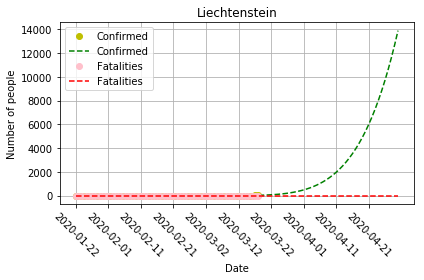

Score(Confirmed):0.792
Score(Fatalities):1.000


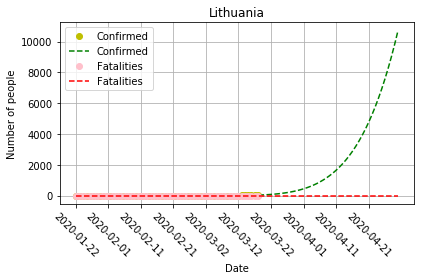

Score(Confirmed):0.987
Score(Fatalities):1.000


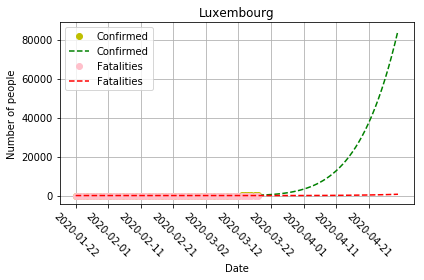

Score(Confirmed):0.981
Score(Fatalities):0.909


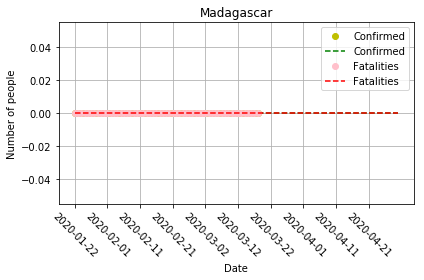

Score(Confirmed):1.000
Score(Fatalities):1.000


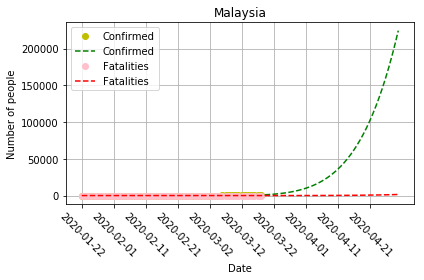

Score(Confirmed):0.986
Score(Fatalities):0.783


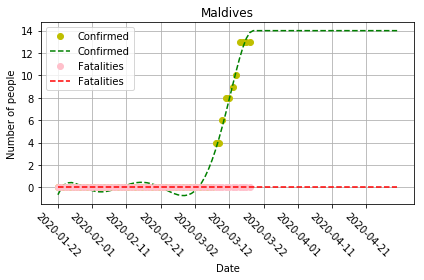

Score(Confirmed):0.975
Score(Fatalities):1.000


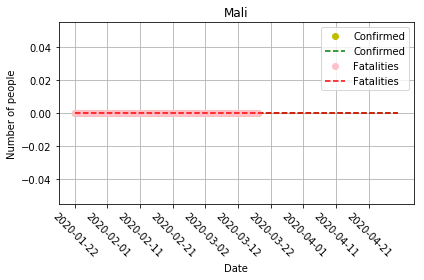

Score(Confirmed):1.000
Score(Fatalities):1.000


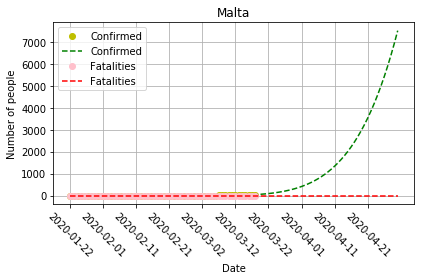

Score(Confirmed):0.985
Score(Fatalities):1.000


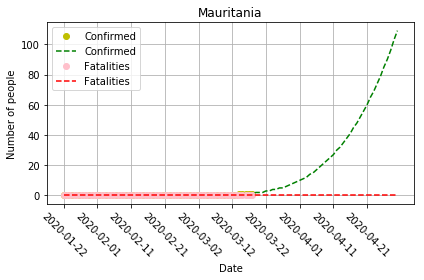

Score(Confirmed):0.832
Score(Fatalities):1.000


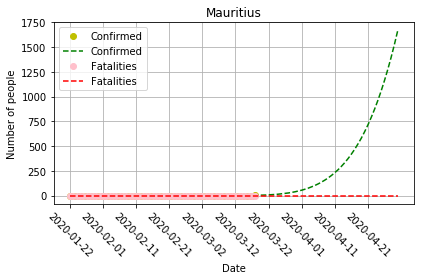

Score(Confirmed):0.573
Score(Fatalities):1.000


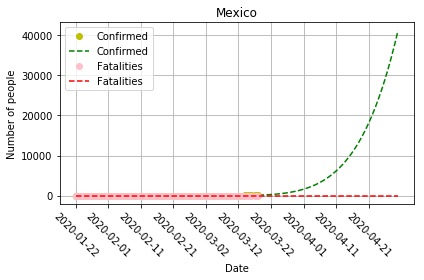

Score(Confirmed):0.983
Score(Fatalities):1.000


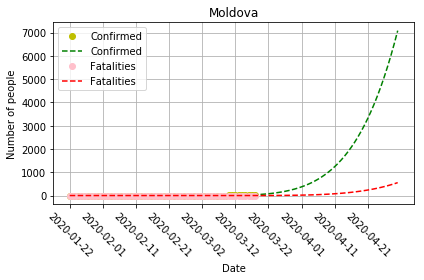

Score(Confirmed):0.964
Score(Fatalities):0.573


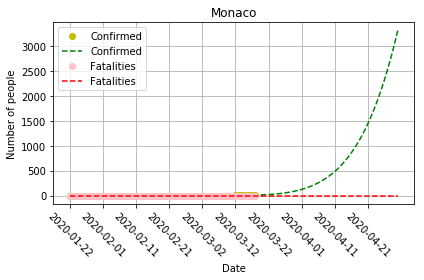

Score(Confirmed):0.915
Score(Fatalities):1.000


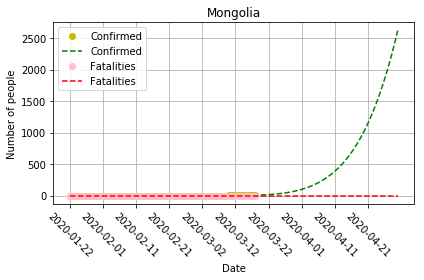

Score(Confirmed):0.872
Score(Fatalities):1.000


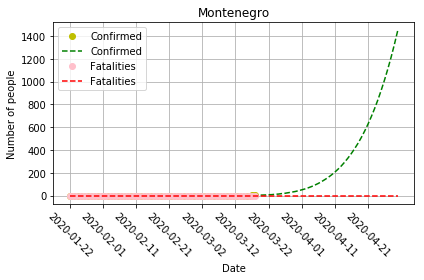

Score(Confirmed):0.783
Score(Fatalities):1.000


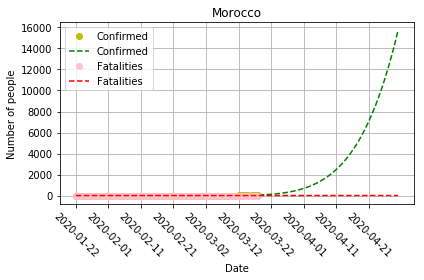

Score(Confirmed):0.985
Score(Fatalities):0.907


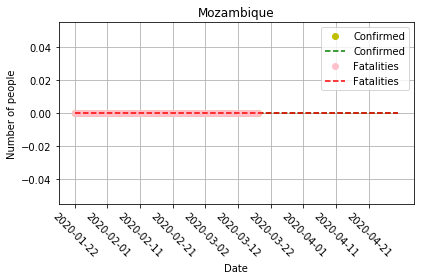

Score(Confirmed):1.000
Score(Fatalities):1.000


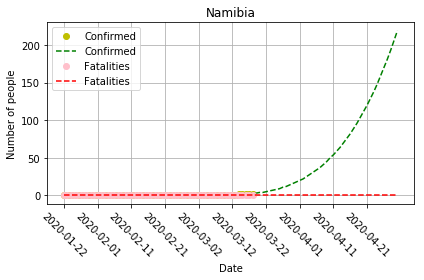

Score(Confirmed):0.832
Score(Fatalities):1.000


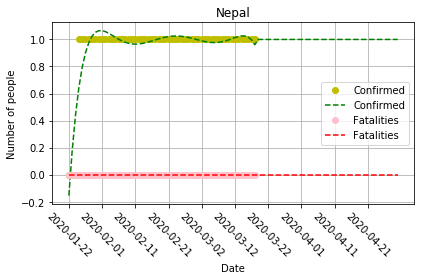

Score(Confirmed):0.835
Score(Fatalities):1.000


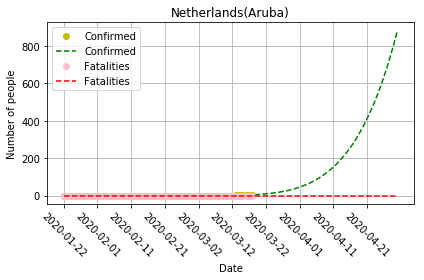

Score(Confirmed):0.934
Score(Fatalities):1.000


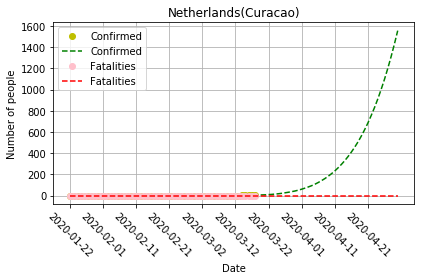

Score(Confirmed):0.932
Score(Fatalities):1.000


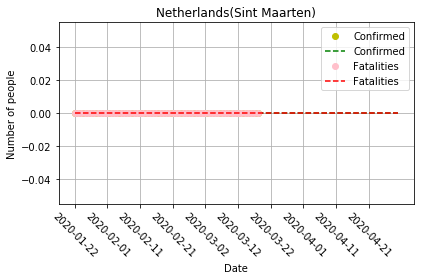

Score(Confirmed):1.000
Score(Fatalities):1.000


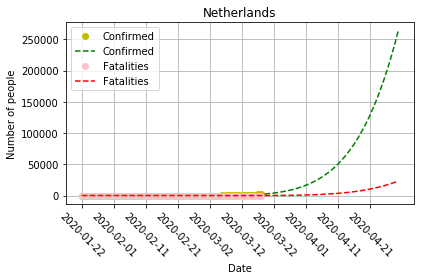

Score(Confirmed):0.998
Score(Fatalities):0.981


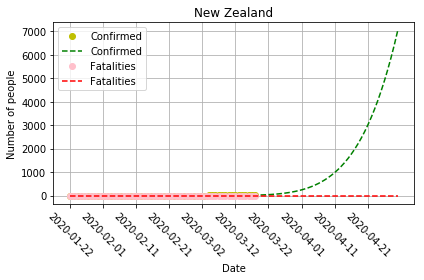

Score(Confirmed):0.935
Score(Fatalities):1.000


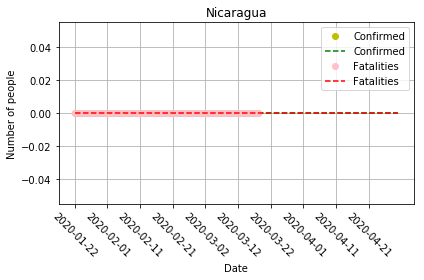

Score(Confirmed):1.000
Score(Fatalities):1.000


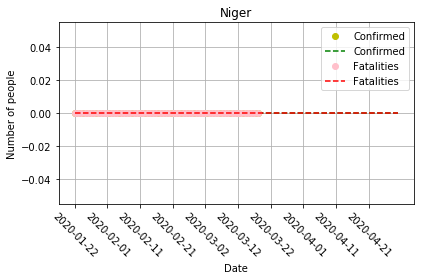

Score(Confirmed):1.000
Score(Fatalities):1.000


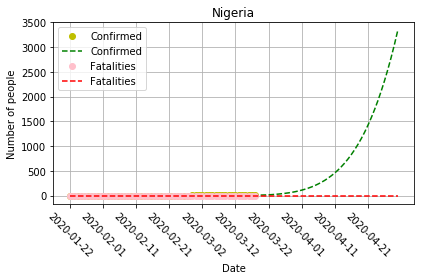

Score(Confirmed):0.848
Score(Fatalities):1.000


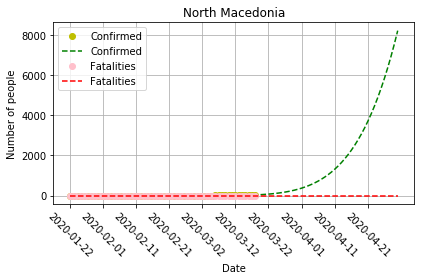

Score(Confirmed):0.982
Score(Fatalities):1.000


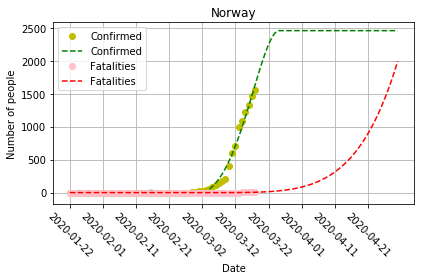

Score(Confirmed):0.987
Score(Fatalities):0.909


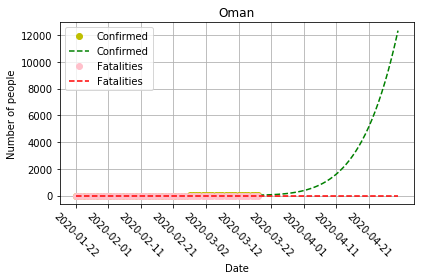

Score(Confirmed):0.961
Score(Fatalities):1.000


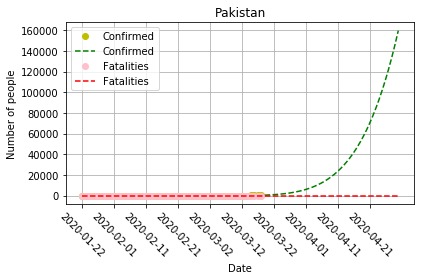

Score(Confirmed):0.961
Score(Fatalities):1.000


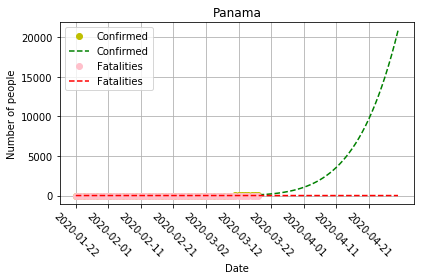

Score(Confirmed):0.992
Score(Fatalities):0.866


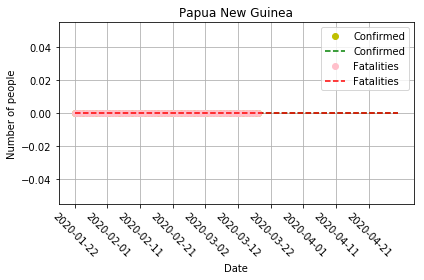

Score(Confirmed):1.000
Score(Fatalities):1.000


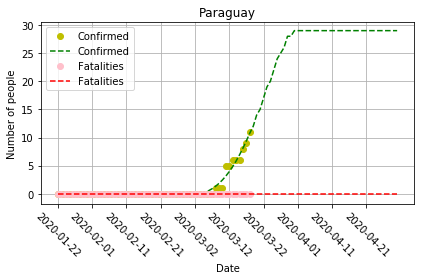

Score(Confirmed):0.967
Score(Fatalities):1.000


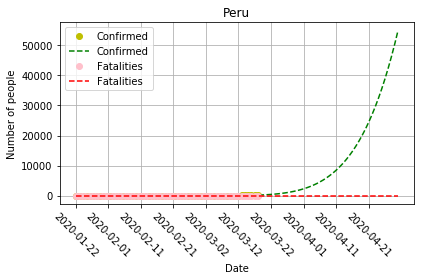

Score(Confirmed):0.988
Score(Fatalities):1.000


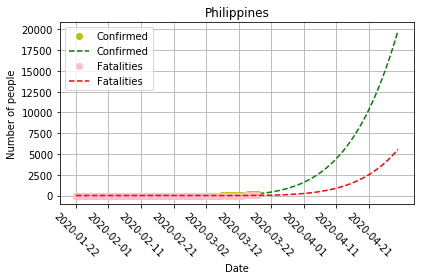

Score(Confirmed):0.988
Score(Fatalities):0.968


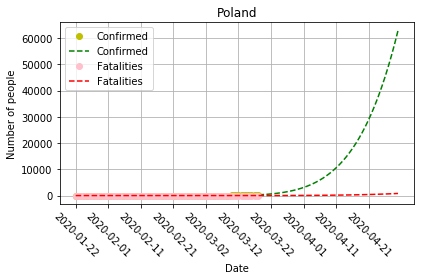

Score(Confirmed):0.992
Score(Fatalities):0.964


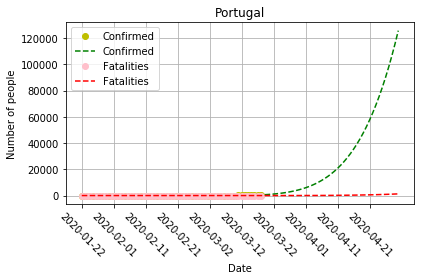

Score(Confirmed):0.984
Score(Fatalities):0.805


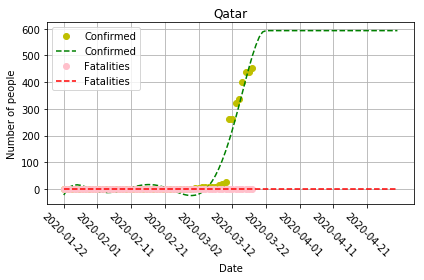

Score(Confirmed):0.944
Score(Fatalities):1.000


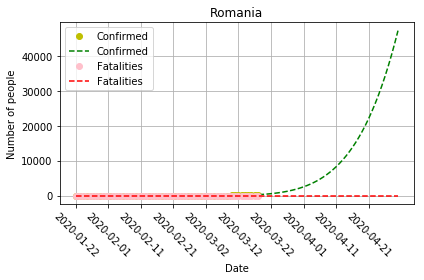

Score(Confirmed):0.991
Score(Fatalities):1.000


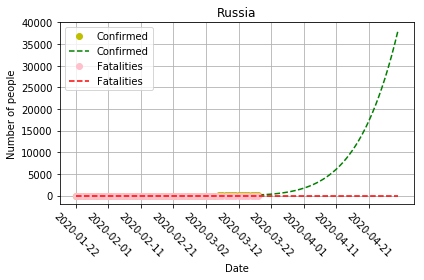

Score(Confirmed):0.994
Score(Fatalities):1.000


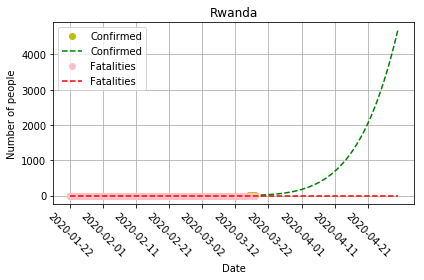

Score(Confirmed):0.944
Score(Fatalities):1.000


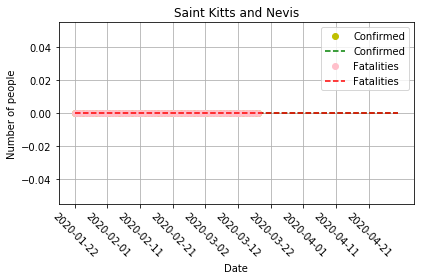

Score(Confirmed):1.000
Score(Fatalities):1.000


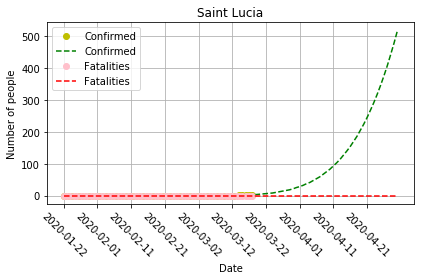

Score(Confirmed):0.878
Score(Fatalities):1.000


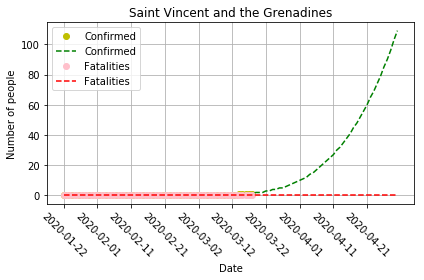

Score(Confirmed):0.832
Score(Fatalities):1.000


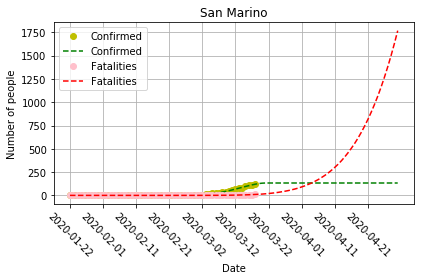

Score(Confirmed):0.995
Score(Fatalities):0.976


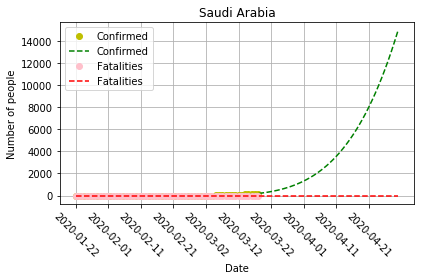

Score(Confirmed):0.978
Score(Fatalities):1.000


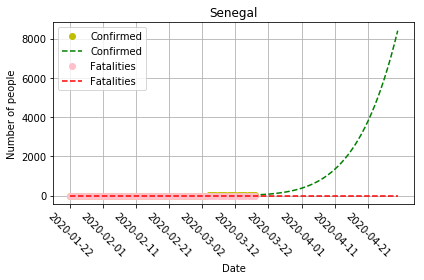

Score(Confirmed):0.954
Score(Fatalities):1.000


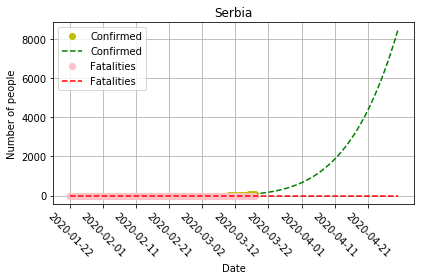

Score(Confirmed):0.982
Score(Fatalities):1.000


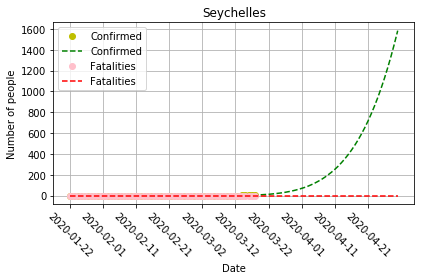

Score(Confirmed):0.944
Score(Fatalities):1.000


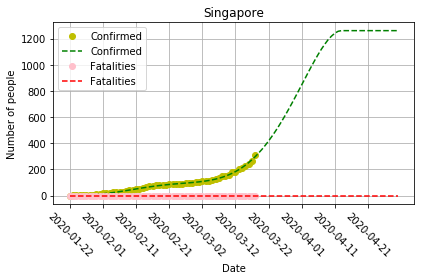

Score(Confirmed):0.997
Score(Fatalities):1.000


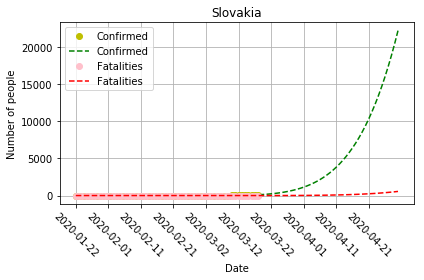

Score(Confirmed):0.990
Score(Fatalities):0.573


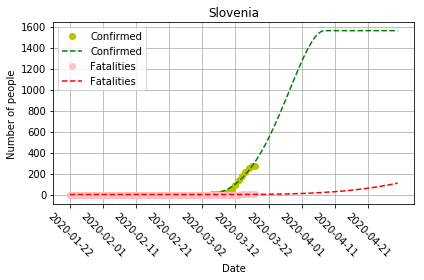

Score(Confirmed):0.975
Score(Fatalities):0.832


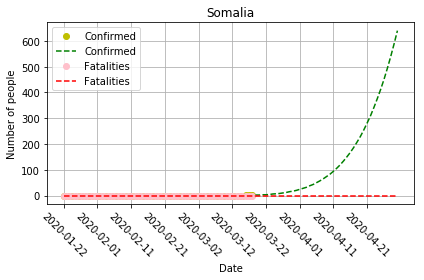

Score(Confirmed):0.835
Score(Fatalities):1.000


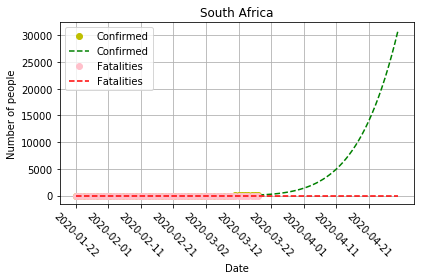

Score(Confirmed):0.976
Score(Fatalities):1.000


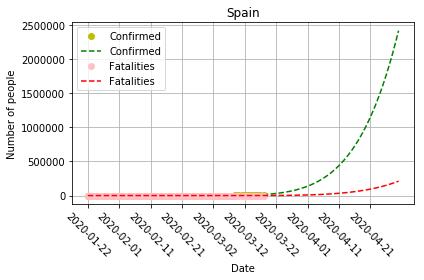

Score(Confirmed):0.994
Score(Fatalities):0.993


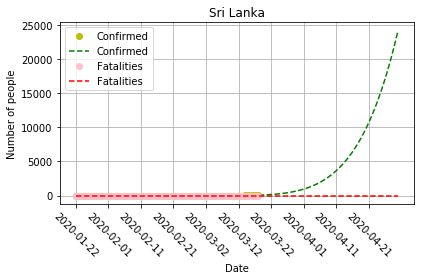

Score(Confirmed):0.985
Score(Fatalities):1.000


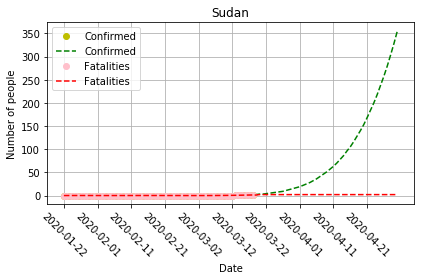

Score(Confirmed):0.894
Score(Fatalities):0.837


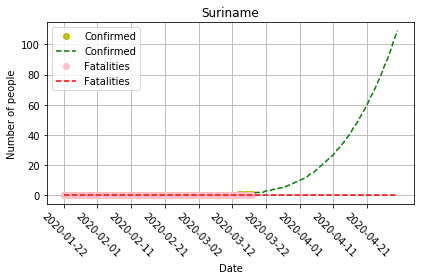

Score(Confirmed):0.832
Score(Fatalities):1.000


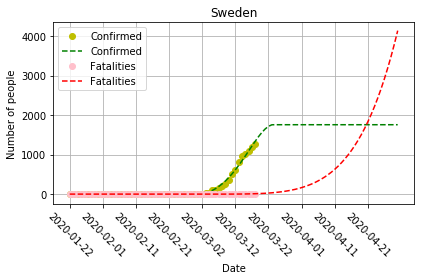

Score(Confirmed):0.990
Score(Fatalities):0.985


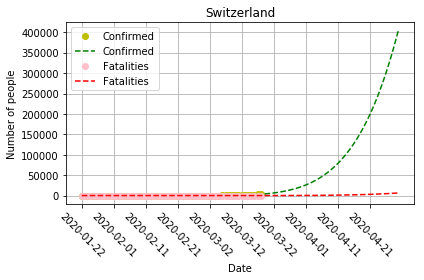

Score(Confirmed):0.989
Score(Fatalities):0.974


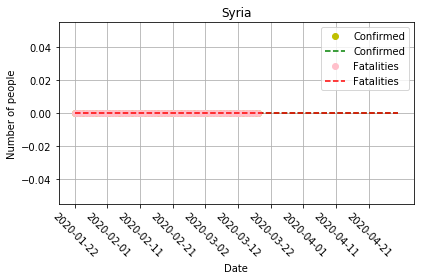

Score(Confirmed):1.000
Score(Fatalities):1.000


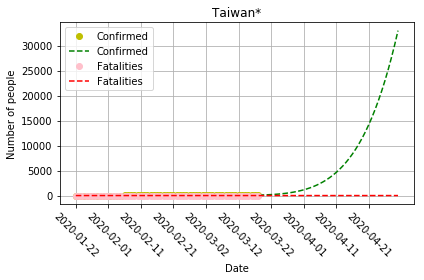

Score(Confirmed):0.991
Score(Fatalities):0.910


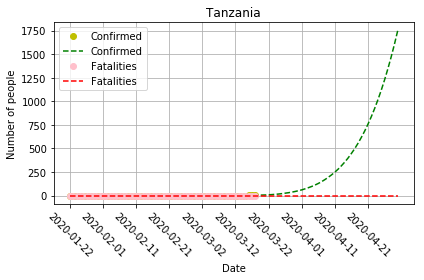

Score(Confirmed):0.855
Score(Fatalities):1.000


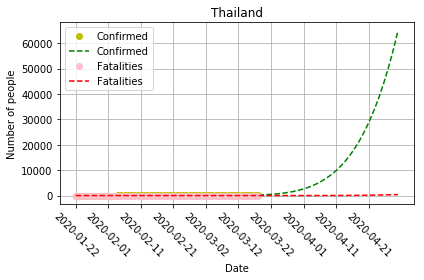

Score(Confirmed):0.993
Score(Fatalities):0.898


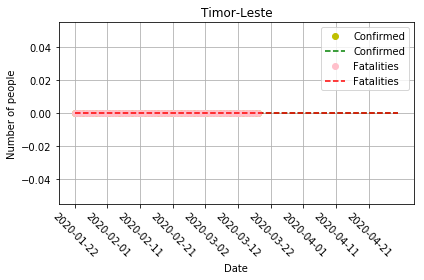

Score(Confirmed):1.000
Score(Fatalities):1.000


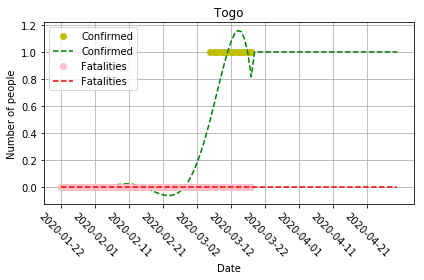

Score(Confirmed):0.895
Score(Fatalities):1.000


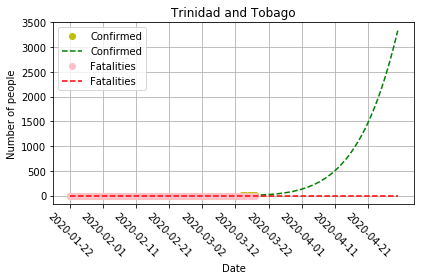

Score(Confirmed):0.976
Score(Fatalities):1.000


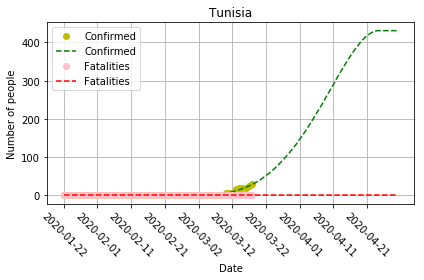

Score(Confirmed):0.980
Score(Fatalities):1.000


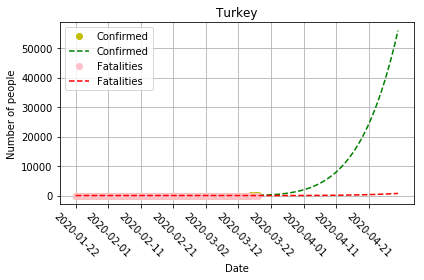

Score(Confirmed):0.890
Score(Fatalities):0.783


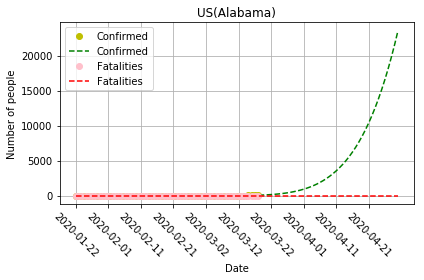

Score(Confirmed):0.972
Score(Fatalities):1.000


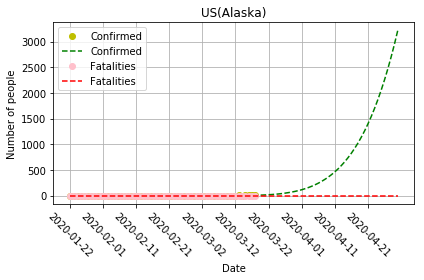

Score(Confirmed):0.888
Score(Fatalities):1.000


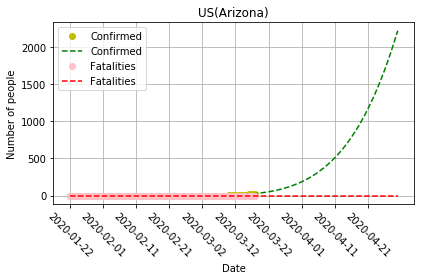

Score(Confirmed):0.977
Score(Fatalities):1.000


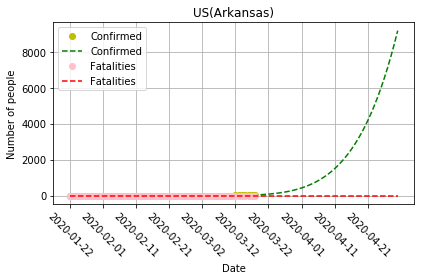

Score(Confirmed):0.984
Score(Fatalities):1.000


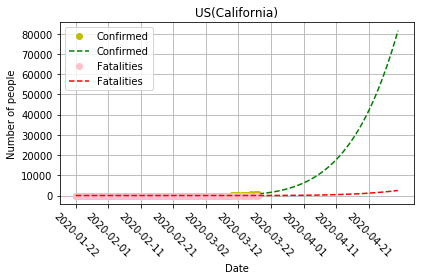

Score(Confirmed):0.989
Score(Fatalities):0.980


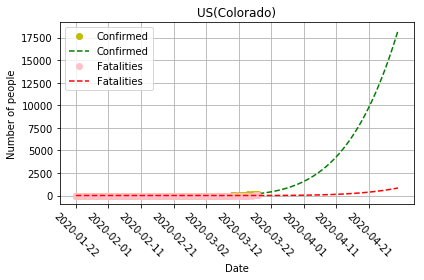

Score(Confirmed):0.973
Score(Fatalities):0.938


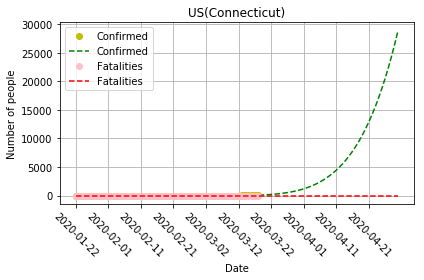

Score(Confirmed):0.965
Score(Fatalities):1.000


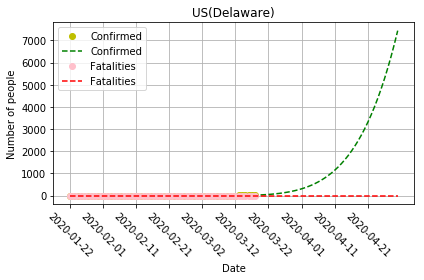

Score(Confirmed):0.981
Score(Fatalities):1.000


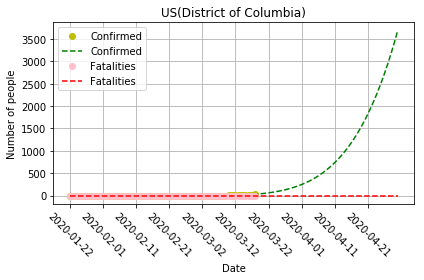

Score(Confirmed):0.974
Score(Fatalities):1.000


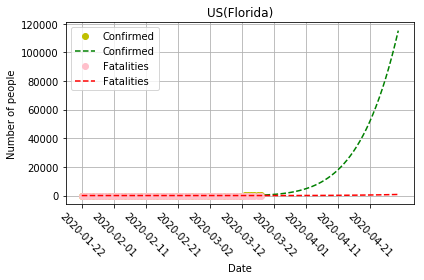

Score(Confirmed):0.994
Score(Fatalities):0.981


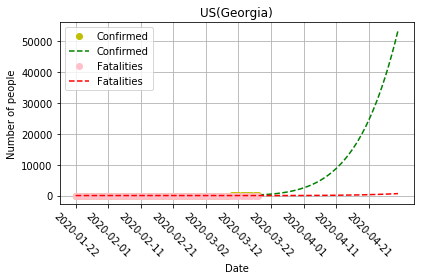

Score(Confirmed):0.996
Score(Fatalities):0.853


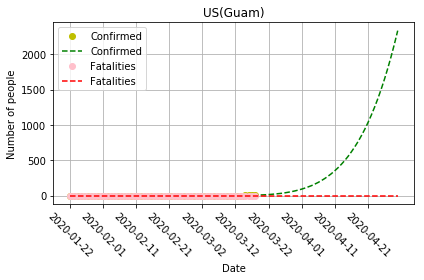

Score(Confirmed):0.913
Score(Fatalities):1.000


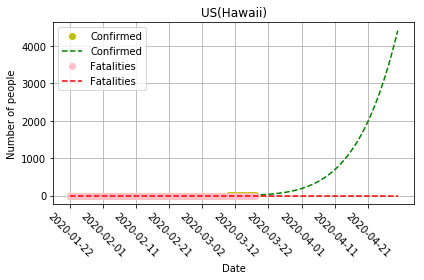

Score(Confirmed):0.987
Score(Fatalities):1.000


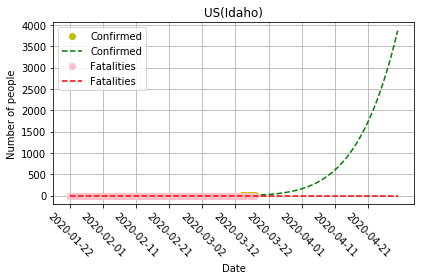

Score(Confirmed):0.973
Score(Fatalities):1.000


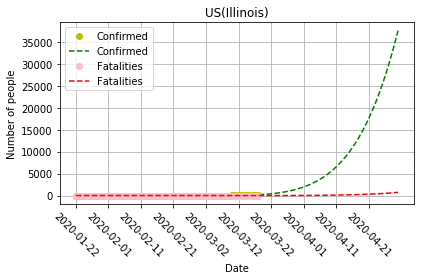

Score(Confirmed):0.987
Score(Fatalities):0.783


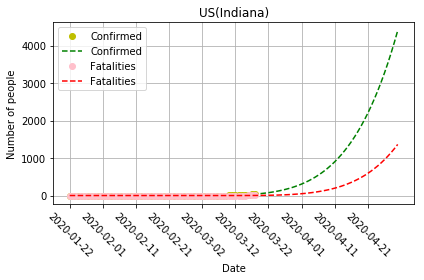

Score(Confirmed):0.986
Score(Fatalities):0.890


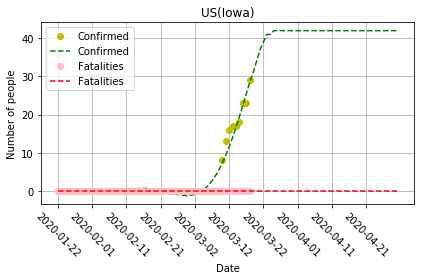

Score(Confirmed):0.957
Score(Fatalities):1.000


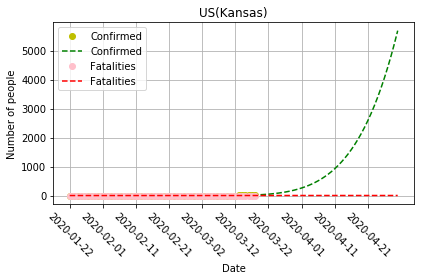

Score(Confirmed):0.976
Score(Fatalities):0.837


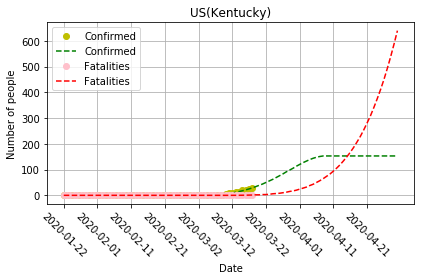

Score(Confirmed):0.979
Score(Fatalities):0.835


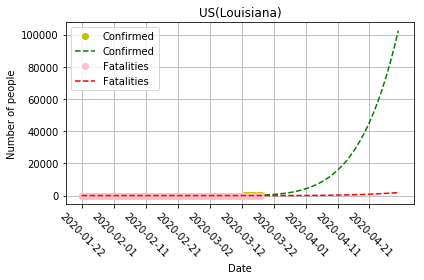

Score(Confirmed):0.994
Score(Fatalities):0.955


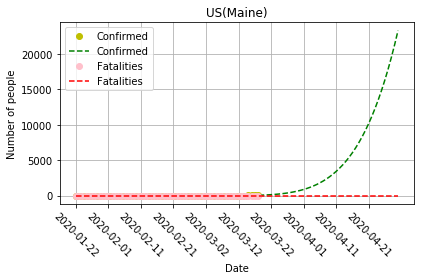

Score(Confirmed):0.971
Score(Fatalities):1.000


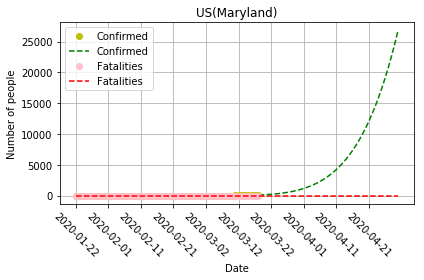

Score(Confirmed):0.993
Score(Fatalities):1.000


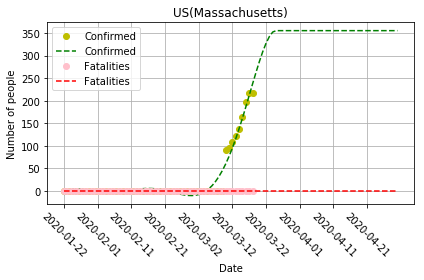

Score(Confirmed):0.964
Score(Fatalities):1.000


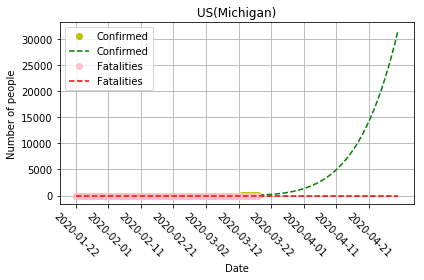

Score(Confirmed):0.990
Score(Fatalities):1.000


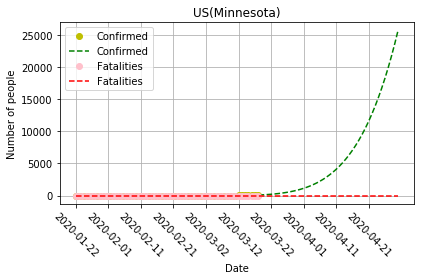

Score(Confirmed):0.991
Score(Fatalities):1.000


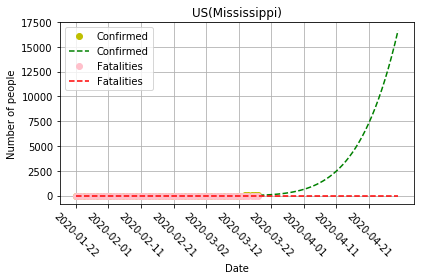

Score(Confirmed):0.977
Score(Fatalities):1.000


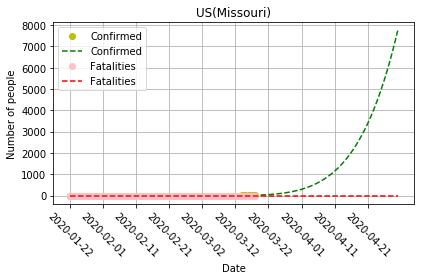

Score(Confirmed):0.969
Score(Fatalities):1.000


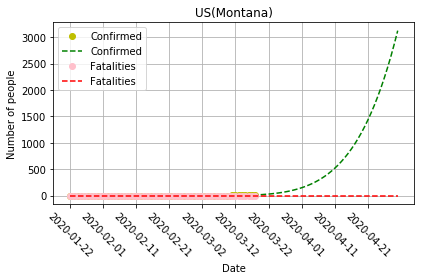

Score(Confirmed):0.968
Score(Fatalities):1.000


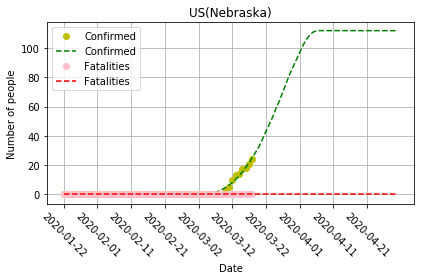

Score(Confirmed):0.974
Score(Fatalities):1.000


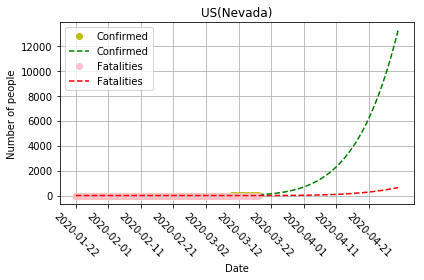

Score(Confirmed):0.977
Score(Fatalities):0.835


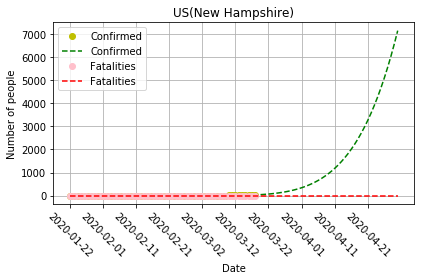

Score(Confirmed):0.978
Score(Fatalities):1.000


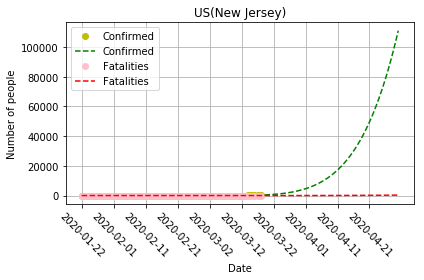

Score(Confirmed):0.974
Score(Fatalities):0.961


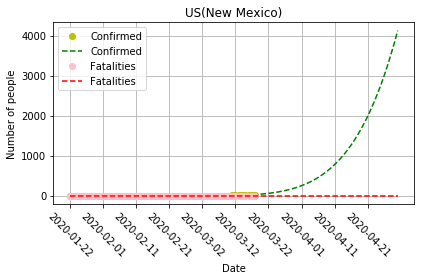

Score(Confirmed):0.979
Score(Fatalities):1.000


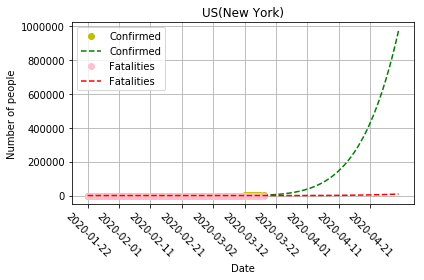

Score(Confirmed):0.979
Score(Fatalities):0.959


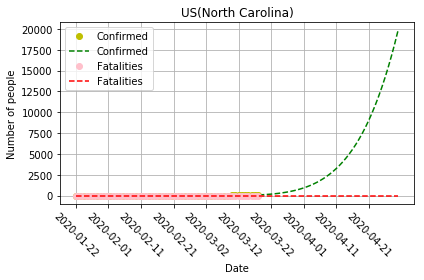

Score(Confirmed):0.989
Score(Fatalities):1.000


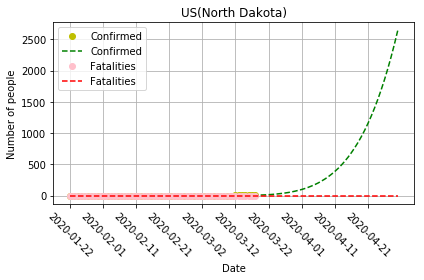

Score(Confirmed):0.889
Score(Fatalities):1.000


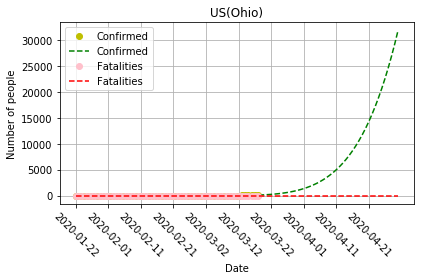

Score(Confirmed):0.995
Score(Fatalities):1.000


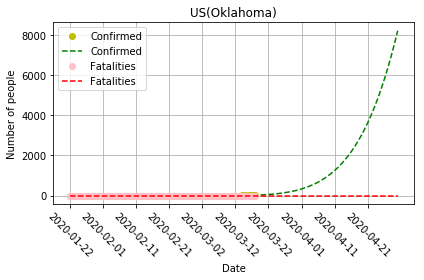

Score(Confirmed):0.966
Score(Fatalities):1.000


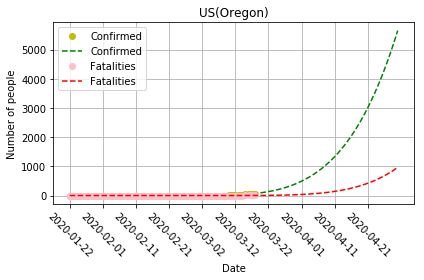

Score(Confirmed):0.973
Score(Fatalities):0.918


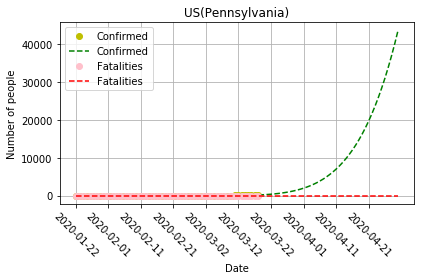

Score(Confirmed):0.995
Score(Fatalities):1.000


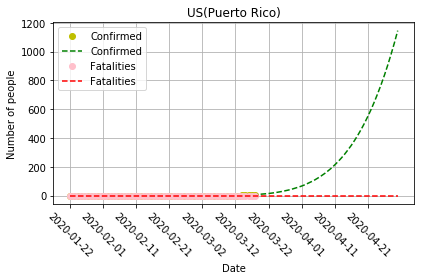

Score(Confirmed):0.875
Score(Fatalities):1.000


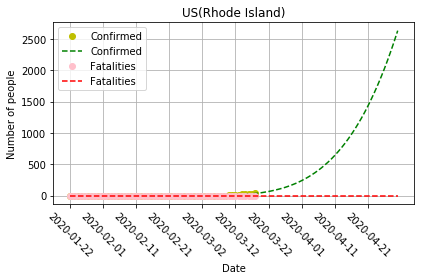

Score(Confirmed):0.964
Score(Fatalities):1.000


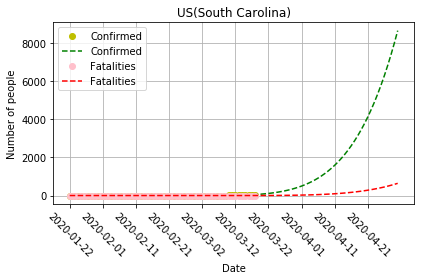

Score(Confirmed):0.986
Score(Fatalities):0.835


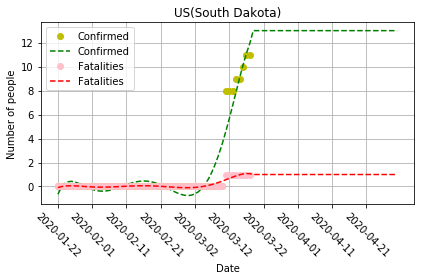

Score(Confirmed):0.911
Score(Fatalities):0.866


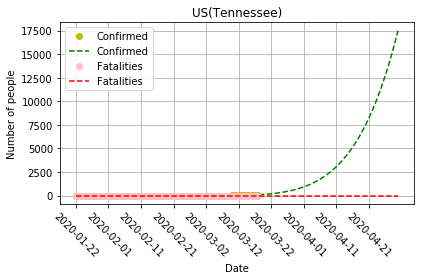

Score(Confirmed):0.992
Score(Fatalities):1.000


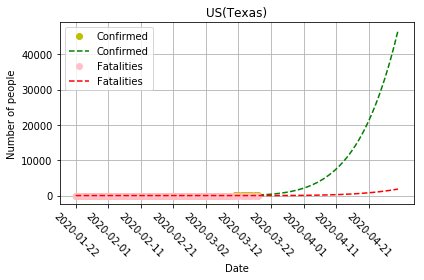

Score(Confirmed):0.989
Score(Fatalities):0.763


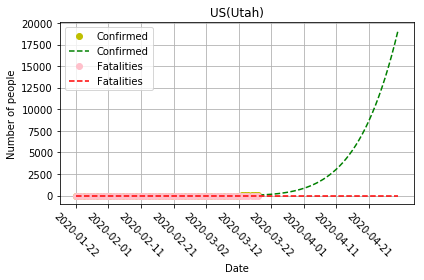

Score(Confirmed):0.969
Score(Fatalities):1.000


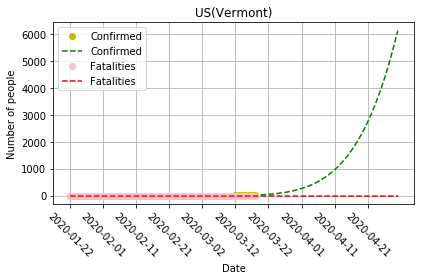

Score(Confirmed):0.984
Score(Fatalities):1.000


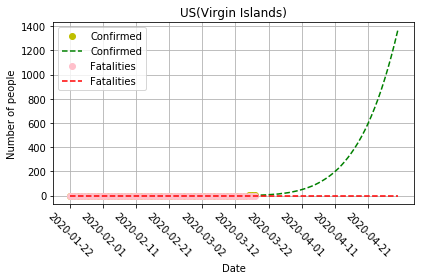

Score(Confirmed):0.890
Score(Fatalities):1.000


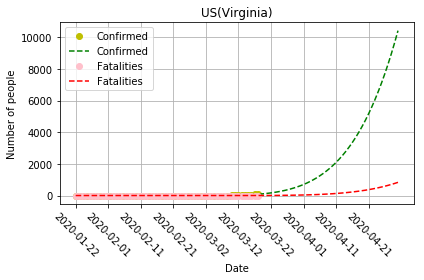

Score(Confirmed):0.985
Score(Fatalities):0.938


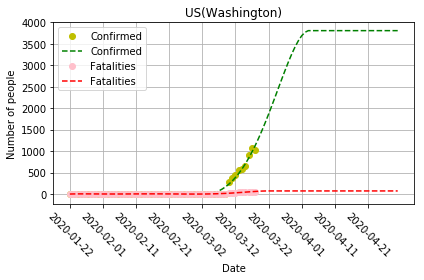

Score(Confirmed):0.971
Score(Fatalities):0.955


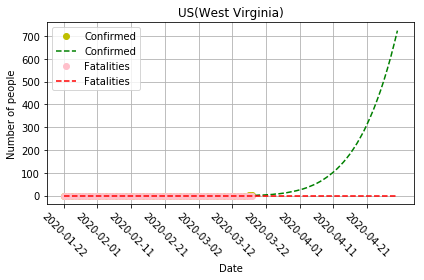

Score(Confirmed):0.783
Score(Fatalities):1.000


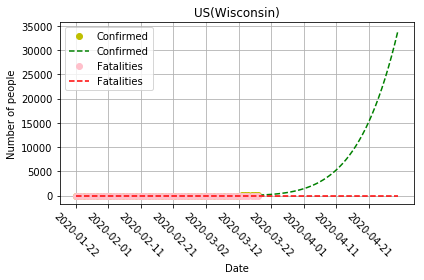

Score(Confirmed):0.994
Score(Fatalities):1.000


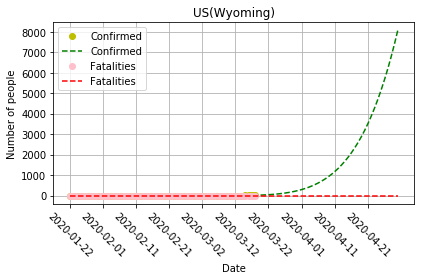

Score(Confirmed):0.933
Score(Fatalities):1.000


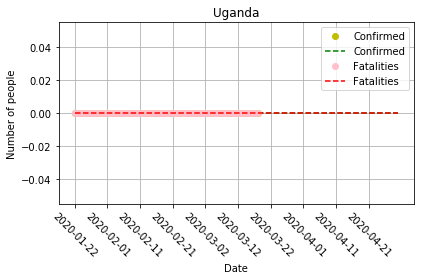

Score(Confirmed):1.000
Score(Fatalities):1.000


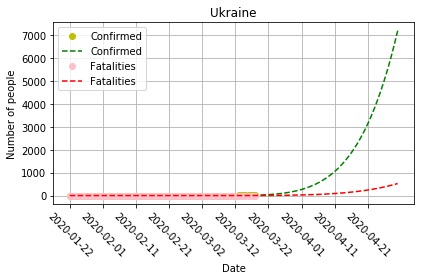

Score(Confirmed):0.939
Score(Fatalities):0.932


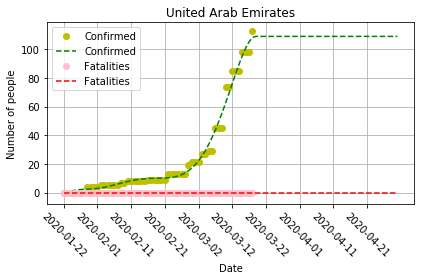

Score(Confirmed):0.987
Score(Fatalities):1.000


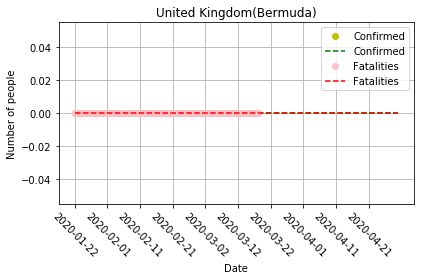

Score(Confirmed):1.000
Score(Fatalities):1.000


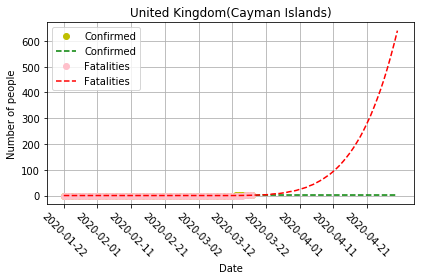

Score(Confirmed):0.837
Score(Fatalities):0.835


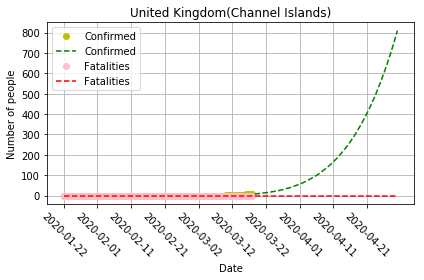

Score(Confirmed):0.953
Score(Fatalities):1.000


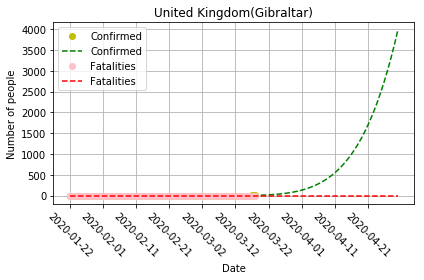

Score(Confirmed):0.777
Score(Fatalities):1.000


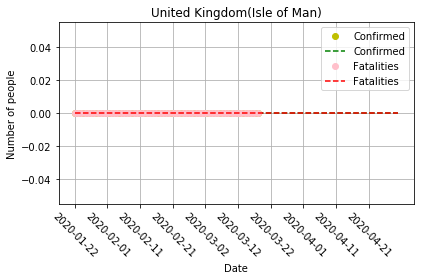

Score(Confirmed):1.000
Score(Fatalities):1.000


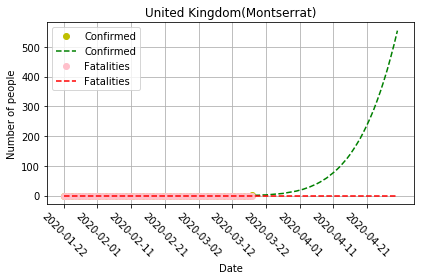

Score(Confirmed):0.573
Score(Fatalities):1.000


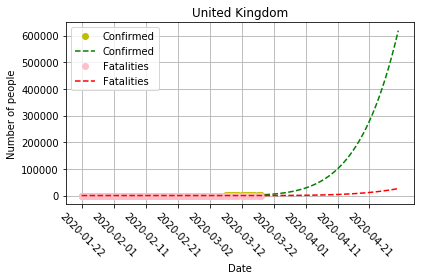

Score(Confirmed):0.993
Score(Fatalities):0.966


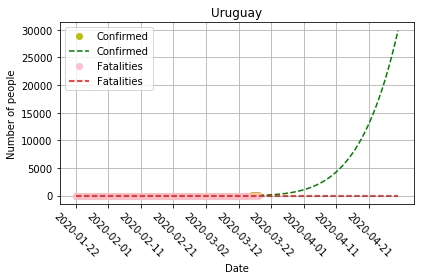

Score(Confirmed):0.902
Score(Fatalities):1.000


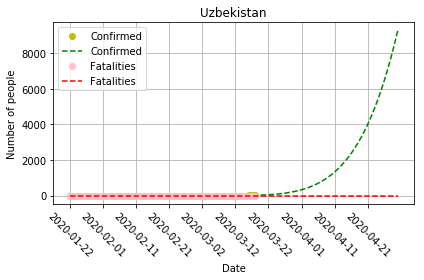

Score(Confirmed):0.936
Score(Fatalities):1.000


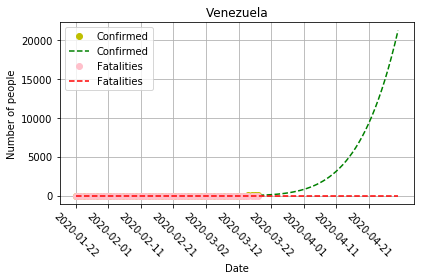

Score(Confirmed):0.955
Score(Fatalities):1.000


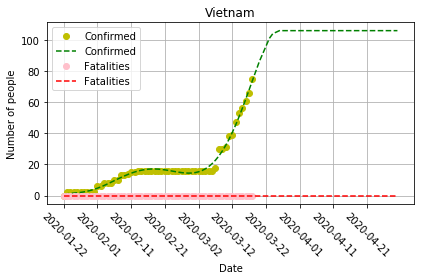

Score(Confirmed):0.992
Score(Fatalities):1.000


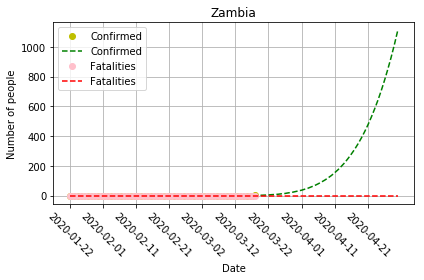

Score(Confirmed):0.573
Score(Fatalities):1.000


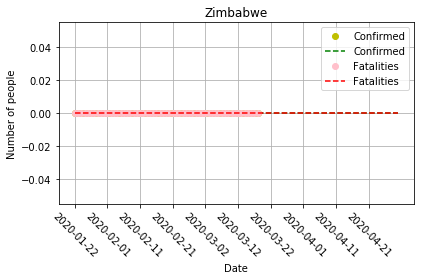

Score(Confirmed):1.000
Score(Fatalities):1.000


In [8]:
# Analysys, Visualization, output CSV
import matplotlib.pyplot as plt
forecast_id = 0
submission_list = []
test_list = []
for i in range(len(work_list)):
    country_list = work_list[i]
    if pd.isnull(country_list[0]['Province_State']):
        province_state = ''
    else:
        province_state = '(' + country_list[0]['Province_State'] + ')'
    country_region = country_list[0]['Country_Region']
    confirmed_list = []
    fatalities_list = []
    for j in range(len(country_list)):
        confirmed = country_list[j]['ConfirmedCases']
        confirmed_list.append(confirmed)
        fatalities = country_list[j]['Fatalities']
        fatalities_list.append(fatalities)
        
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    x = date_list
    y_c = np.array(confirmed_list)
    y_f = np.array(fatalities_list)
    x1 = np.arange(len(x))
    #**********************************************************
    # Determine dimensions
    dimension_c = 6 # for confirmed cases
    dimension_f = 6 # for fatalities
    fit_c = np.polyfit(x1, y_c, dimension_c)
    fit_f = np.polyfit(x1, y_f, dimension_f)
    #**********************************************************
    y_c2 = np.poly1d(fit_c)(x1)
    y_f2 = np.poly1d(fit_f)(x1)

    # predict
    temp_date = np.append(x, add_date_list)
    x2 = x
    predict_list_c = []
    predict_list_f = []
    saved_predict_c = 0
    saved_predict_f = 0
    inner_count = 0
    for j in range(len(x), len(temp_date)):
        predict_c = round(np.poly1d(fit_c)(j))
        predict_f = round(np.poly1d(fit_f)(j))
#        if predict_c < predict_f:
#            predict_f = predict_c
        x2 = np.append(x2, temp_date[j])
        if predict_c > saved_predict_c:
            predict_list_c.append(predict_c)
            saved_predict_c = predict_c
        else:
            predict_list_c.append(saved_predict_c)
        if predict_f > saved_predict_f:
            predict_list_f.append(predict_f)
            saved_predict_f = predict_f
        else:
            predict_list_f.append(saved_predict_f)
        # for submission
        forecast_id += 1
        submission_dic = {'ForecastId':forecast_id,
                          'ConfirmedCases':saved_predict_c,
                          'Fatalities':saved_predict_f
                         }
        test_dic = {'ForecastId':forecast_id,
                    'ConfirmedCases':saved_predict_c,
                    'Fatalities':saved_predict_f,
                    'Date':np_add_date_list[inner_count],
                    'Province_State':province_state,
                    'Country_Region':country_region
                   }
        
        inner_count += 1
        submission_list.append(submission_dic)
        test_list.append(test_dic)
        
    predict_list_c = np.array(predict_list_c)
    predict_list_f = np.array(predict_list_f)
    y_c3 = np.append(y_c2, predict_list_c)
    y_f3 = np.append(y_f2, predict_list_f)

    ax.plot(x,y_c,'bo', color='y', label='Confirmed')
    ax.plot(x2,y_c3,'--k', color='g', label='Confirmed')
    ax.plot(x,y_f,'bo', color='pink', label='Fatalities')
    ax.plot(x2,y_f3,'--k', color='r', label='Fatalities')

    plt.title(country_region + province_state)
    plt.xlabel("Date")
    plt.ylabel("Number of people")
    plt.xticks(np.arange(0, len(x2), 10), rotation=-45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

    # r2_score
    from sklearn.metrics import r2_score
    print('Score(Confirmed):{:.3f}'.format(r2_score(y_c, y_c2)))
    print('Score(Fatalities):{:.3f}'.format(r2_score(y_f, y_f2)))